In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.model_selection import cross_val_score
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
#show all rows and columns 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv("Automobile_insurance_fraud.csv")
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
5                   256   39         104594       12-10-2006           OH   
6                   137   34         413978       04-06-2000           IN   
7                   165   37         429027       03-02-1990           IL   
8                    27   33         485665       05-02-1997           IL   
9                   212   42         636550       25-07-2011           IL   
10                  235   42         543610       26-05-2002           OH   
11                  447   61         214618       29-05-1999           OH   
12                   60   23         842643       20-11-1997           OH   
13                  121   34         626808       26-10-2012           OH   
14                  180   38         644081       28-12-1998           OH   
15                  473   58         892874       19-10-1992           IN   
16                   70   26         558938       08-06-2005           OH   
17                  140   31         275265       15-11-2004           IN   
18                  160   37         921202       28-12-2014           OH   
19                  196   39         143972       02-08-1992           IN   
20                  460   62         183430       25-06-2002           IN   
21                  217   41         431876       27-11-2005           IL   
22                  370   55         285496       27-05-1994           IL   
23                  413   55         115399       08-02-1991           IN   
24                  237   40         736882       02-02-1996           IN   
25                    8   35         699044       05-12-2013           OH   
26                  257   43         863236       20-09-1990           IN   
27                  202   34         608513       18-07-2002           IN   
28                  224   40         914088       08-02-1990           OH   
29                  241   45         596785       04-03-2014           IL   
30                   64   25         908616       18-02-2000           IL   
31                  166   37         666333       19-06-2008           IL   
32                  155   35         336614       01-08-2003           IL   
33                  114   30         584859       04-04-1992           IL   
34                  149   37         990493       13-01-1991           IL   
35                  147   33         129872       08-08-2010           OH   
36                   62   28         200152       09-03-2003           IL   
37                  289   49         933293       03-02-1993           IL   
38                  431   54         485664       25-11-2002           IN   
39                  199   37         982871       27-07-1997           IN   
40                   79   26         206213       08-05-1995           IL   
41                  116   34         616337       30-08-2012           IN   
42                   37   23         448961       30-04-2006           IL   
43                  106   30         790442       13-04-2003           OH   
44                  269   44         108844       05-12-2007           IL   
45                  265   40         430029       21-08-2006           IL   
46                  163   33         529112       08-01-1990           IN   
47                  355   47         939631       18-03-1990           OH   
48                  175   34         866931       07-01-2008           IN   
49                  192   35         582011       10-03-1997           IL   
50                  430   59         691189       10-01-2004           OH   
5

In [4]:
df.shape

(1000, 40)

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

                                             |                                             | [  0%]   00:00 ->…


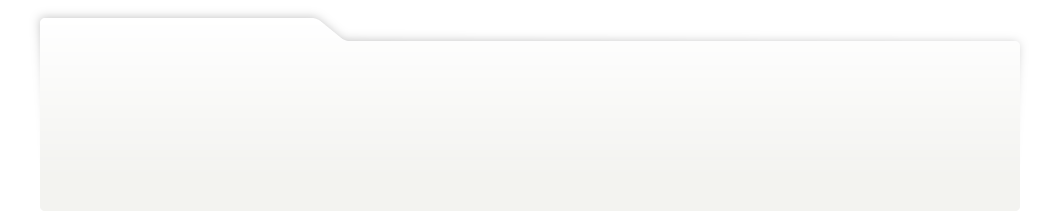
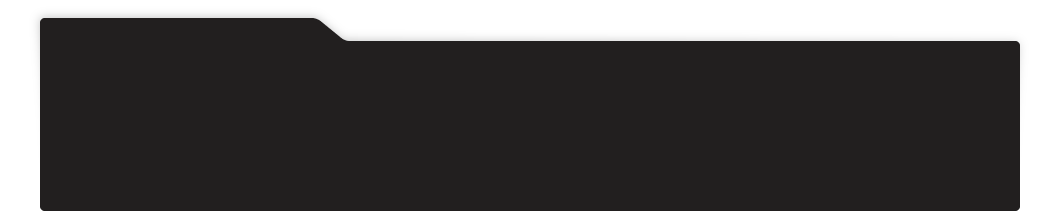
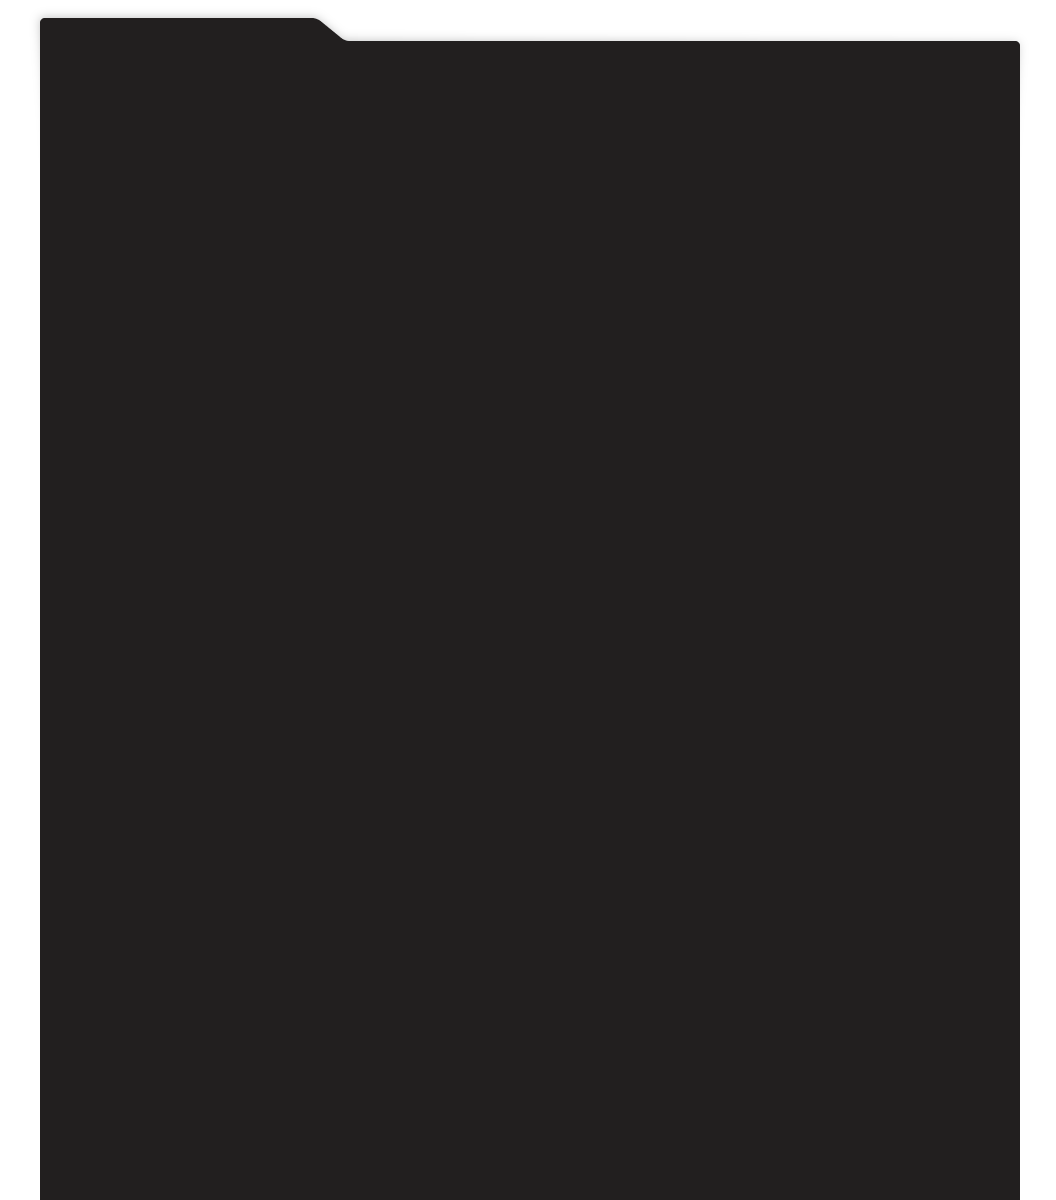
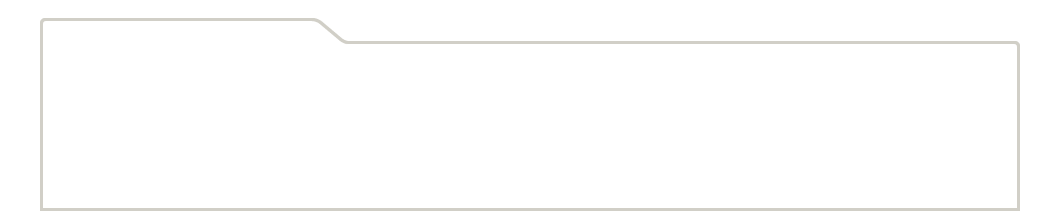
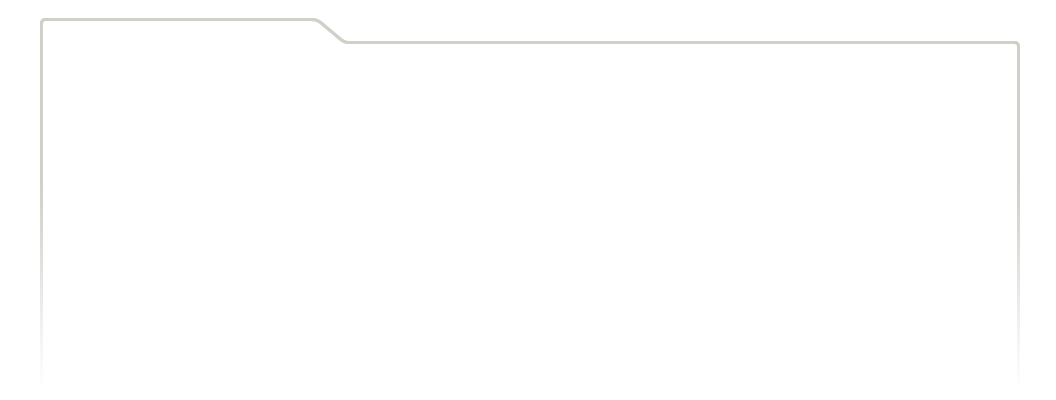
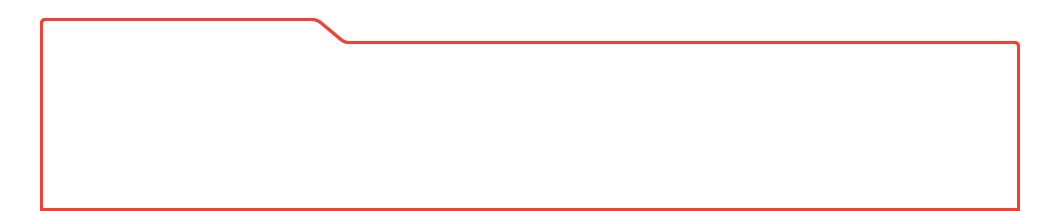
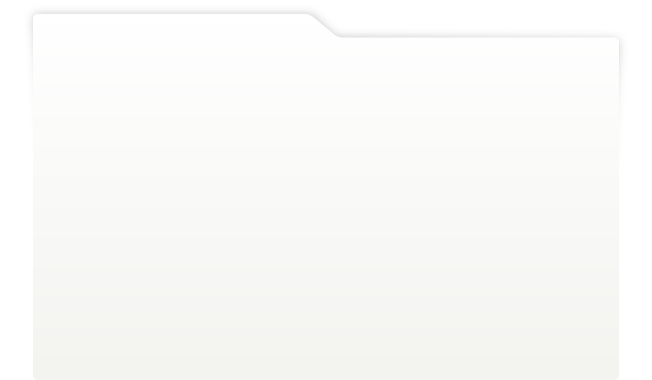
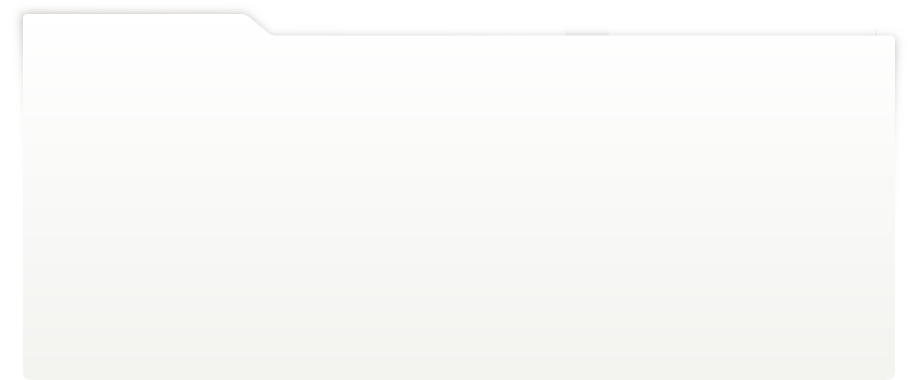
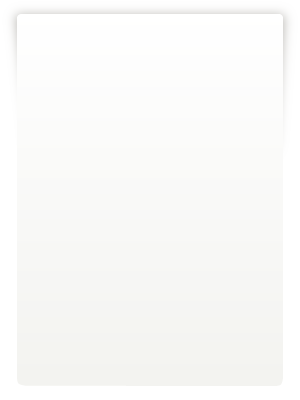
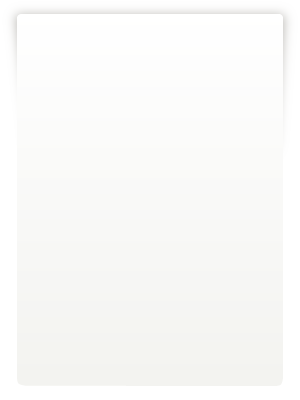
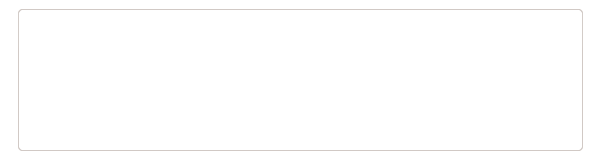
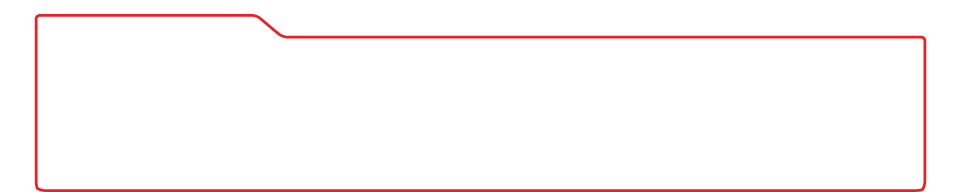
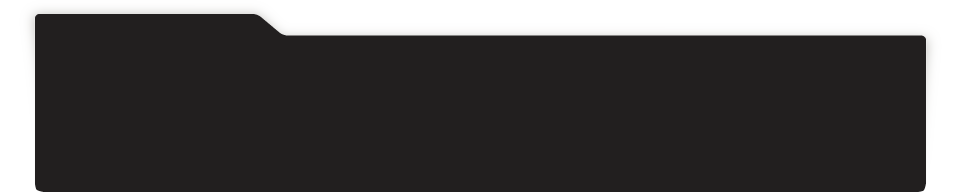
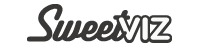
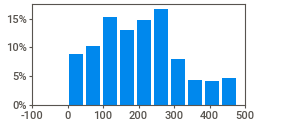
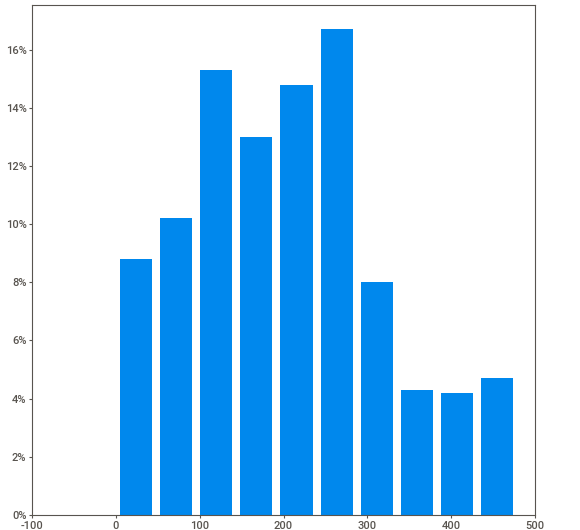
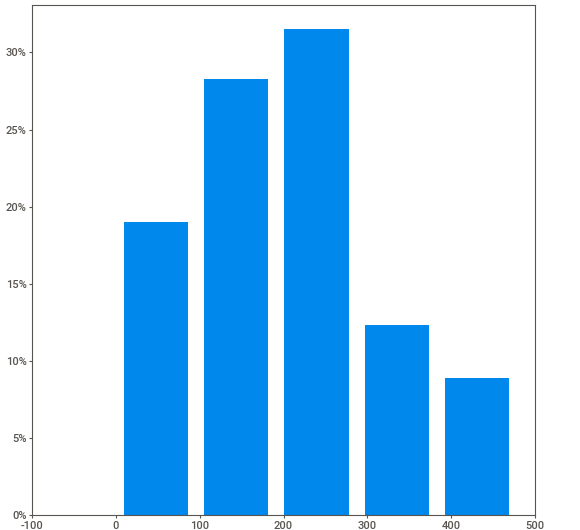
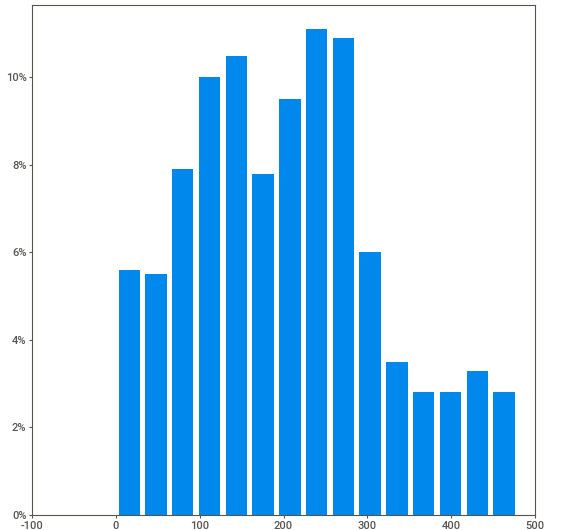
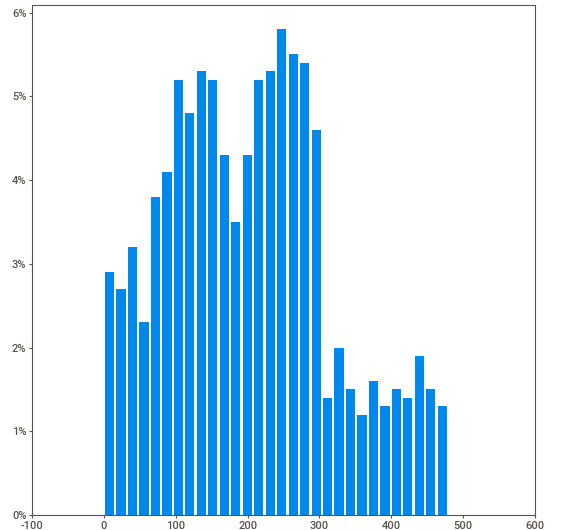
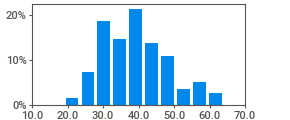
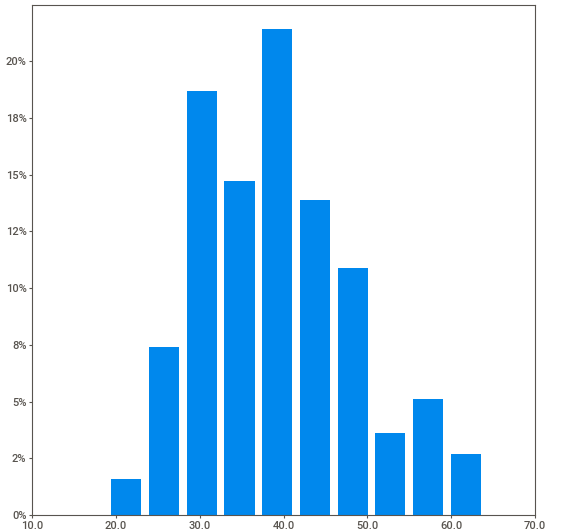
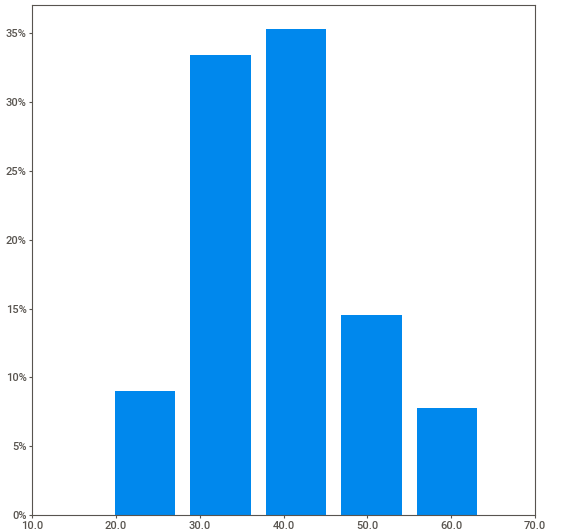
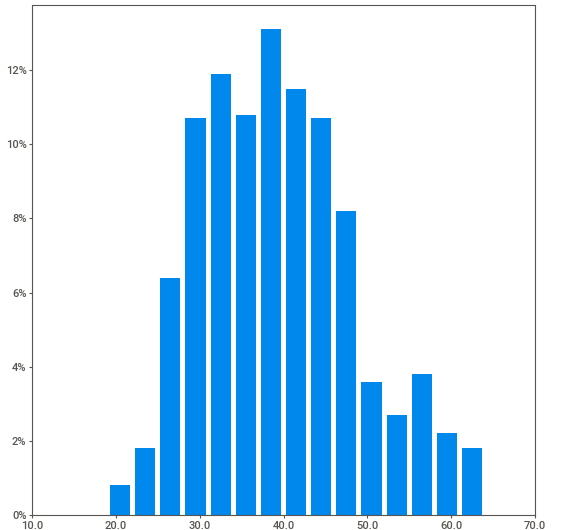
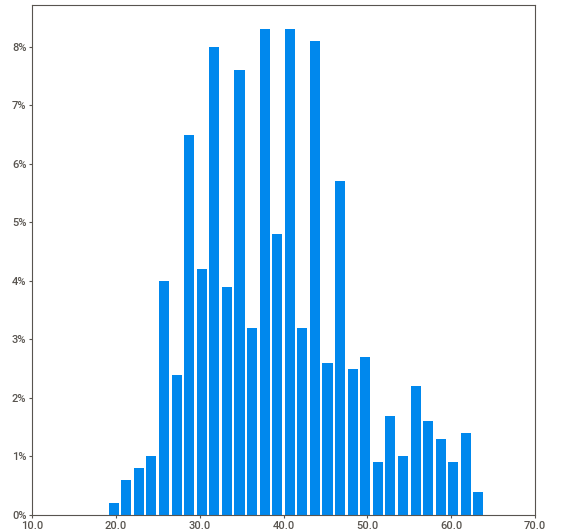
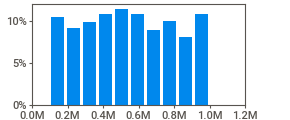
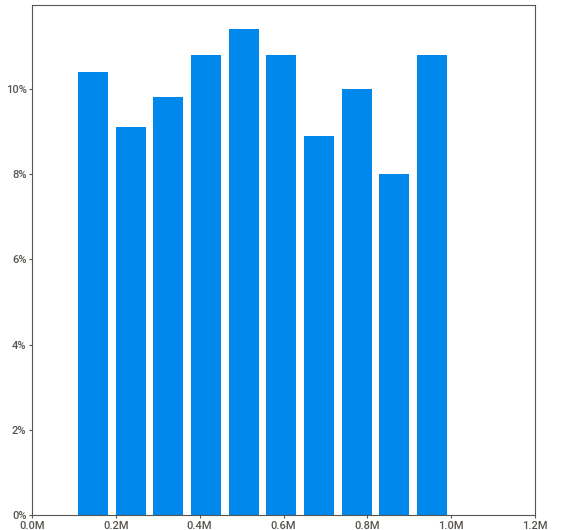
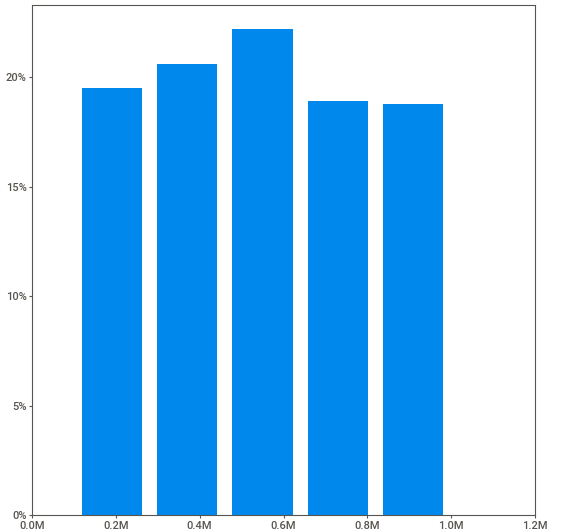
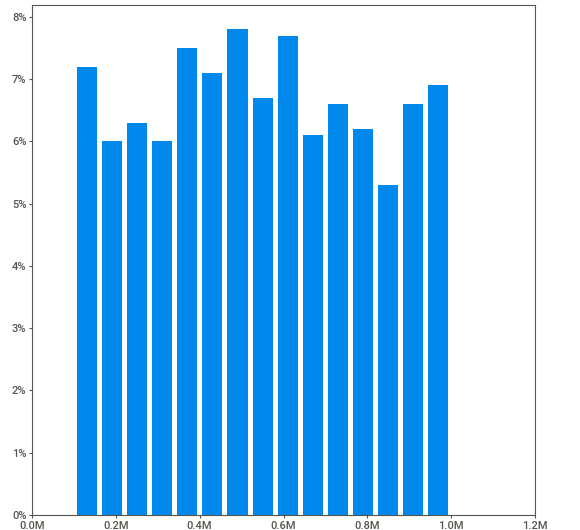
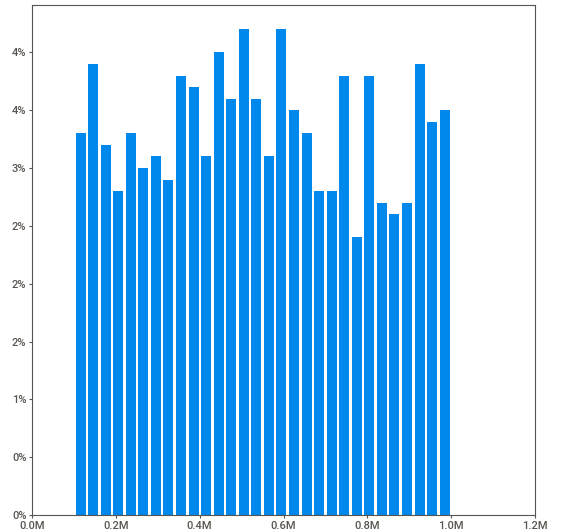
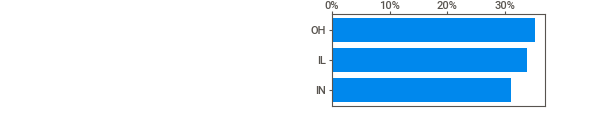
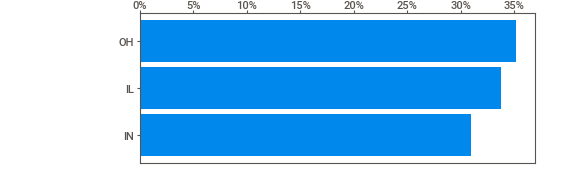
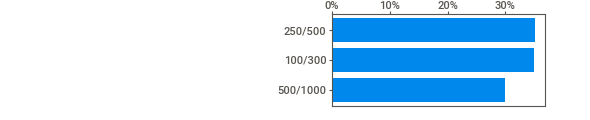
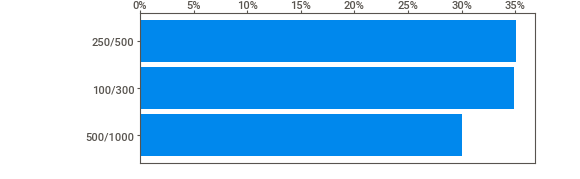
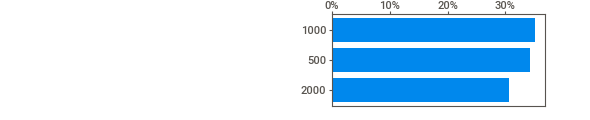
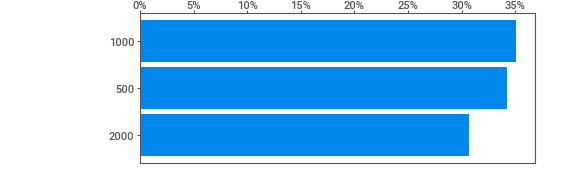
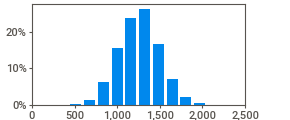
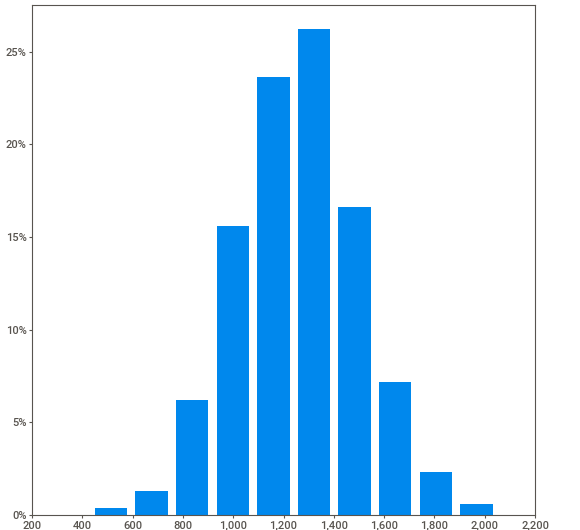
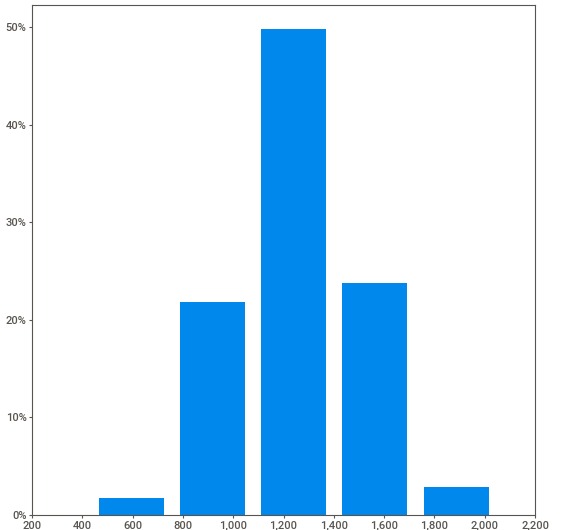
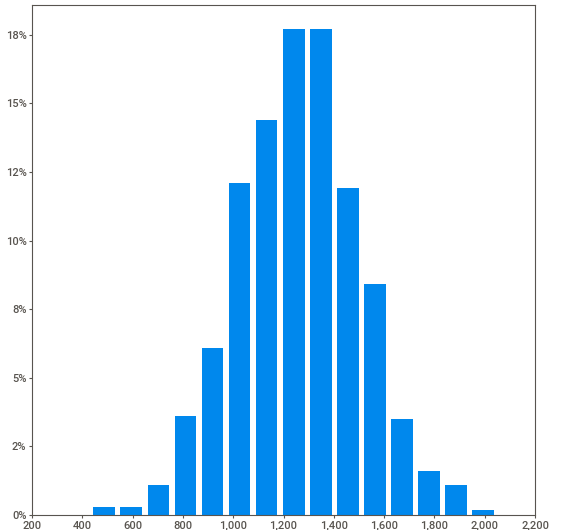
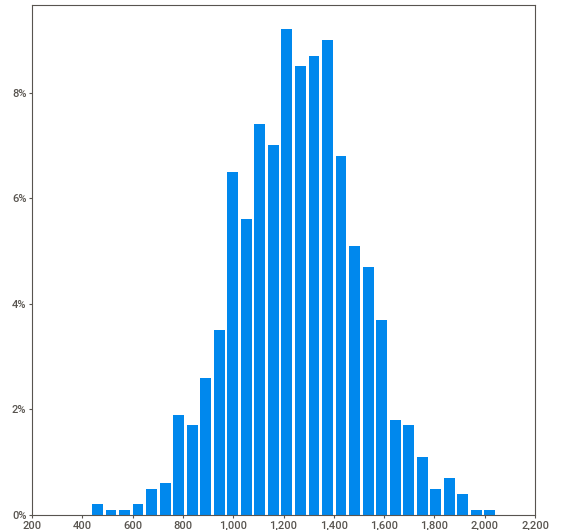
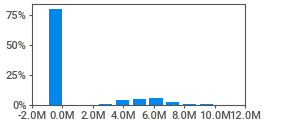
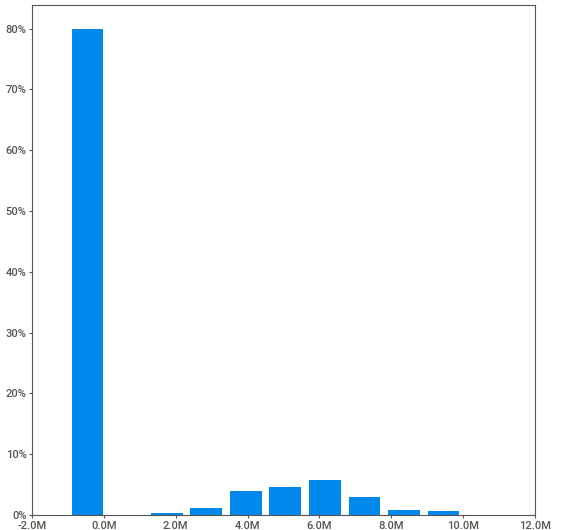
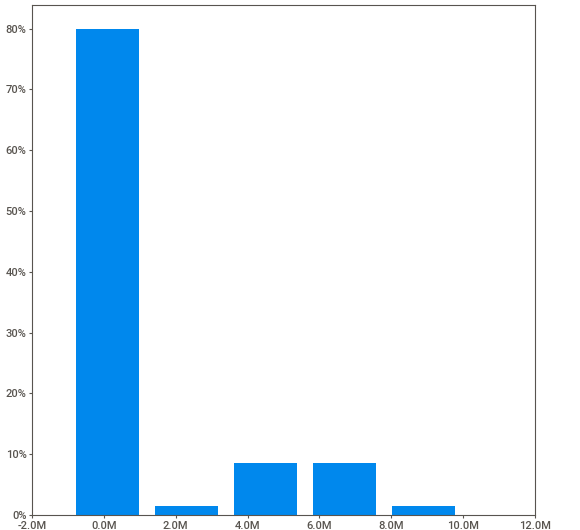
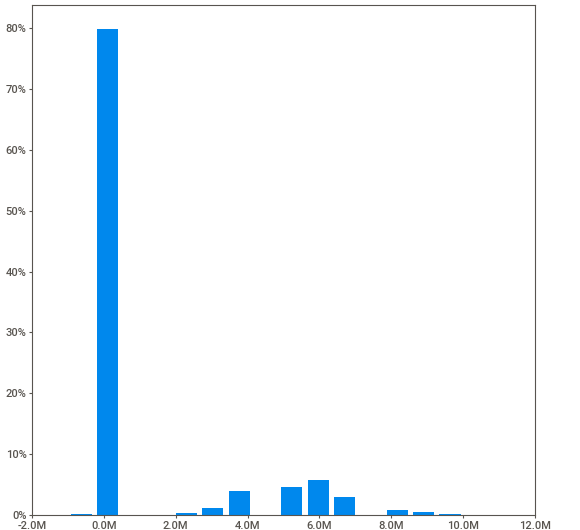
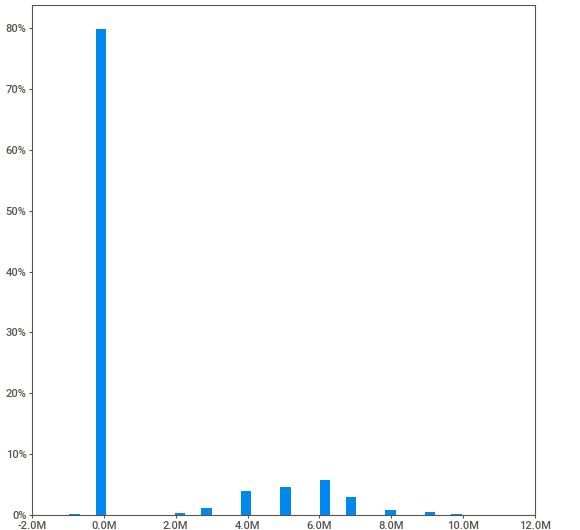
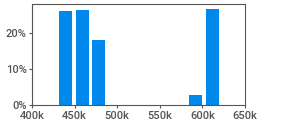
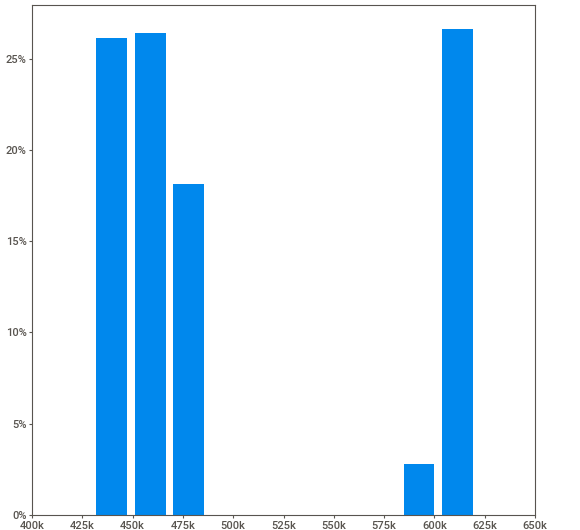
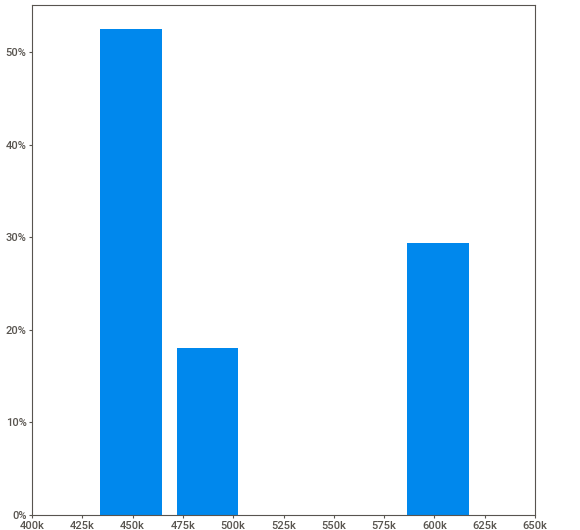
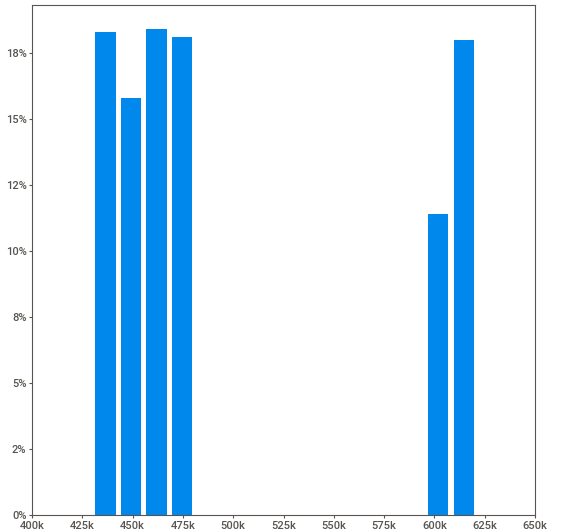
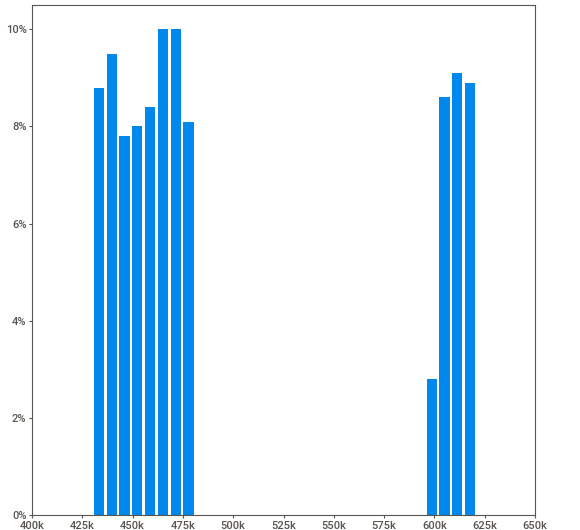
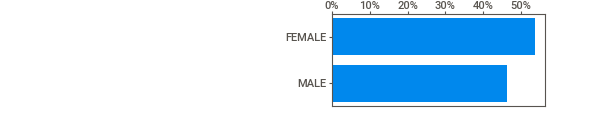
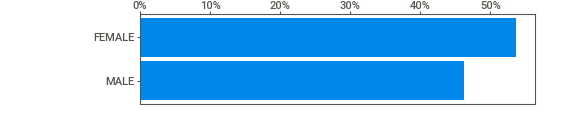
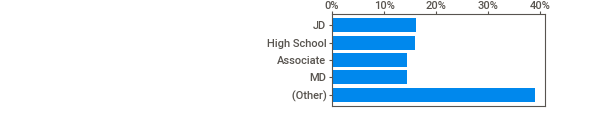
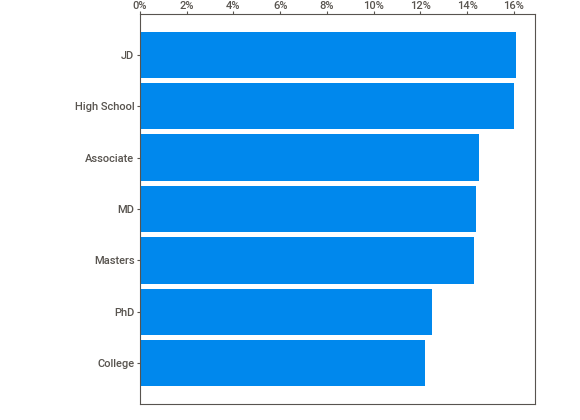
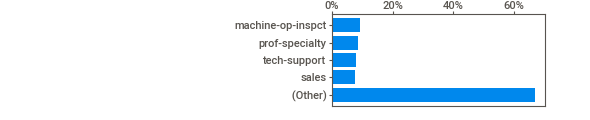
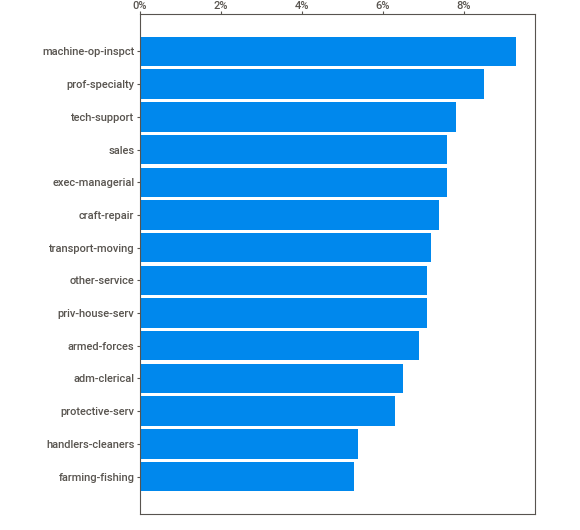
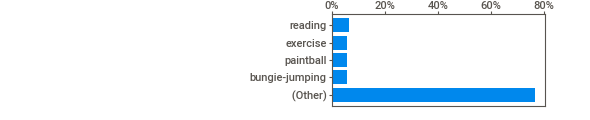
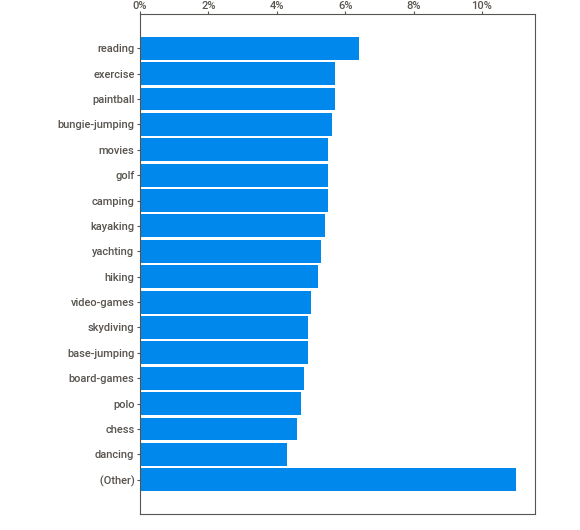
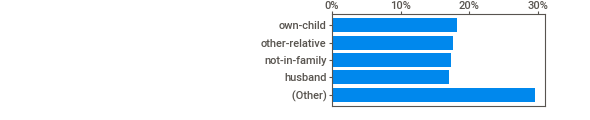
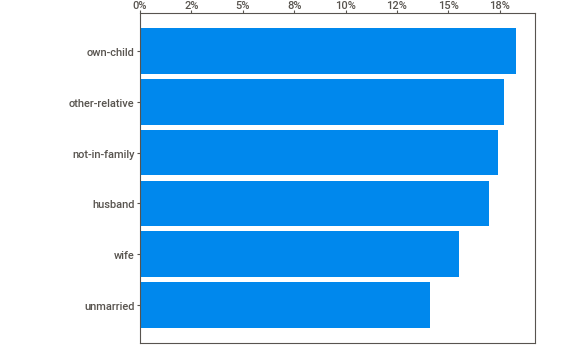
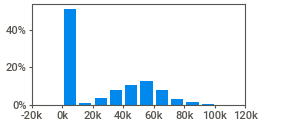
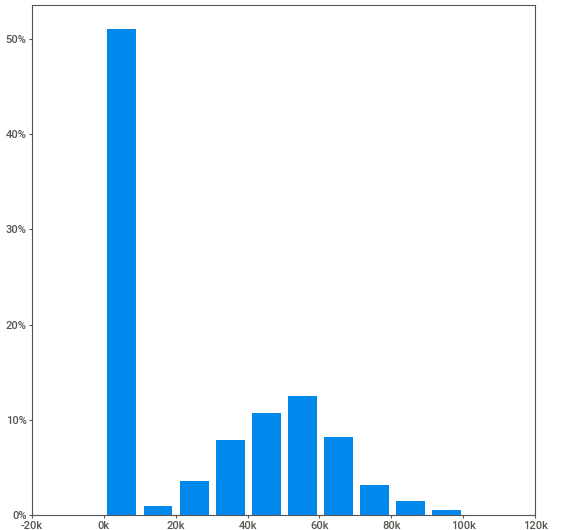
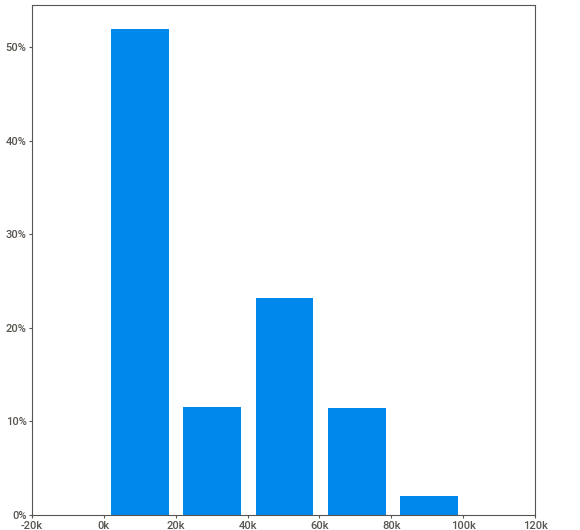
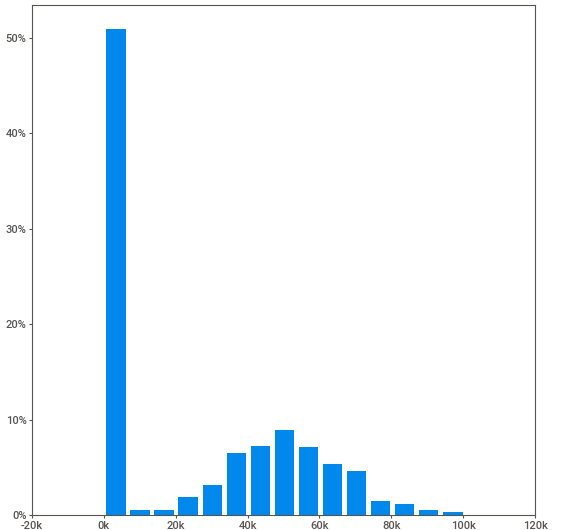
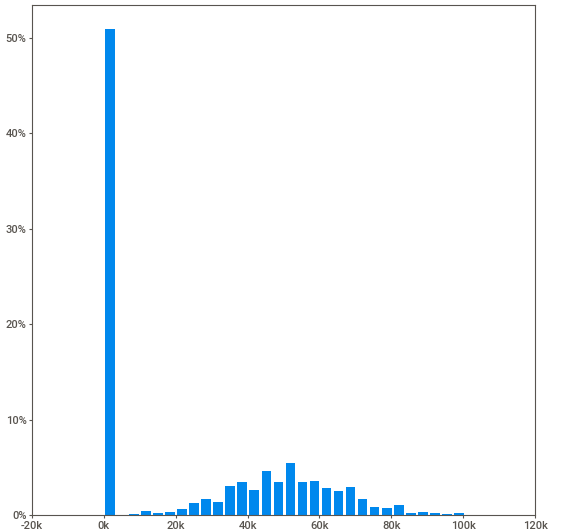
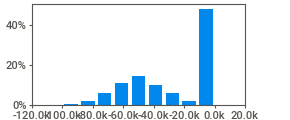
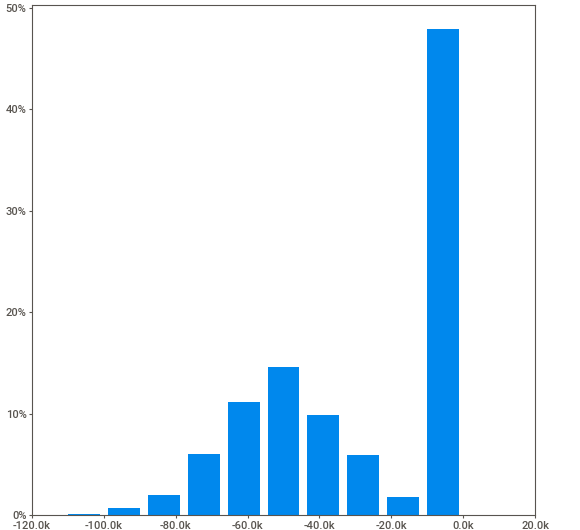
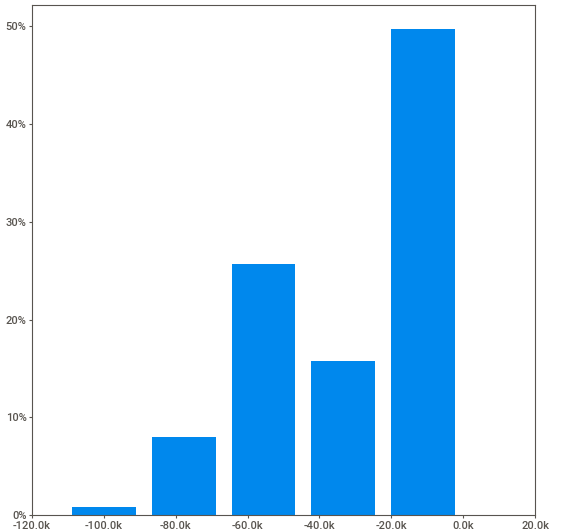
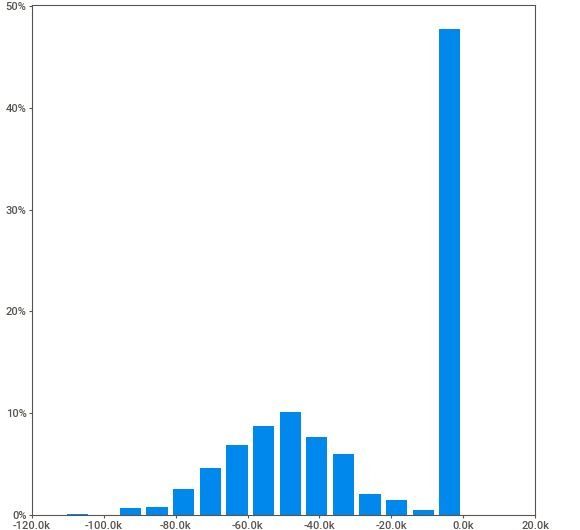
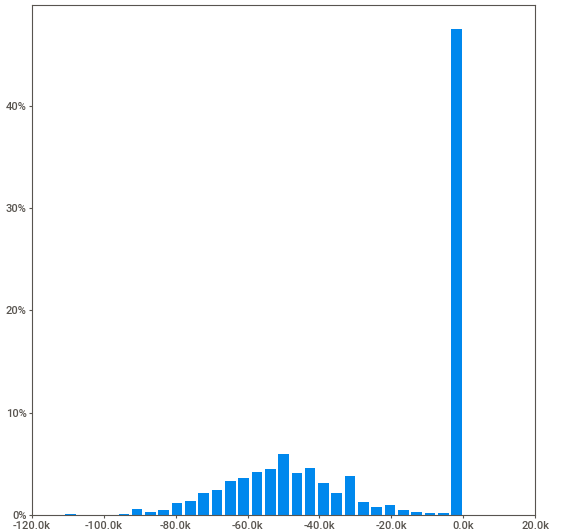
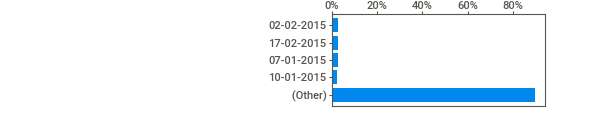
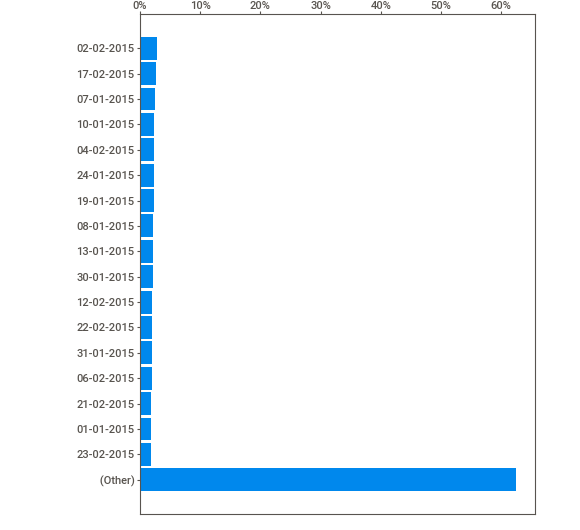
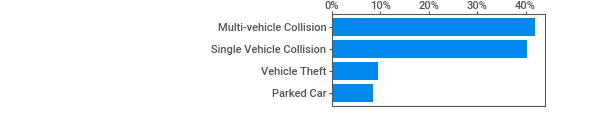
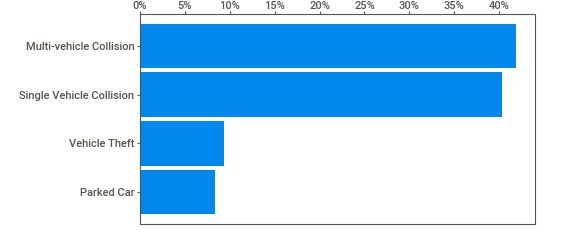
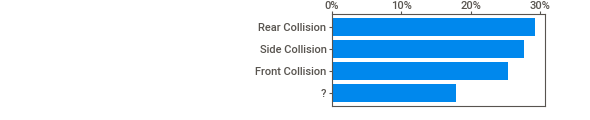
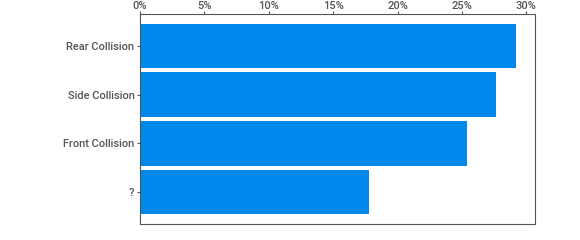
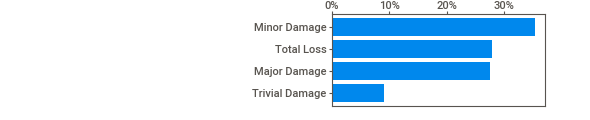
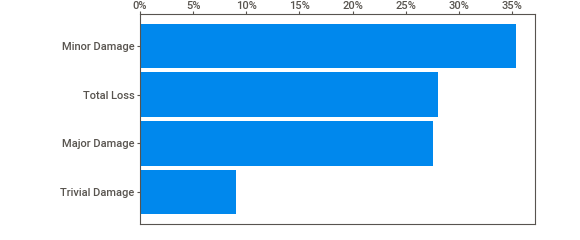
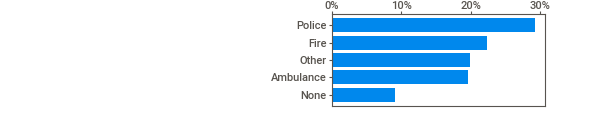
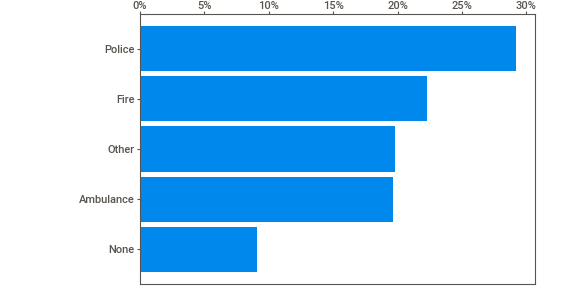
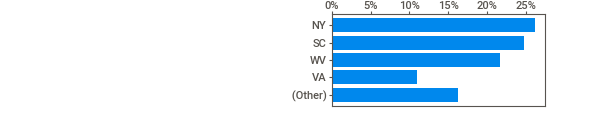
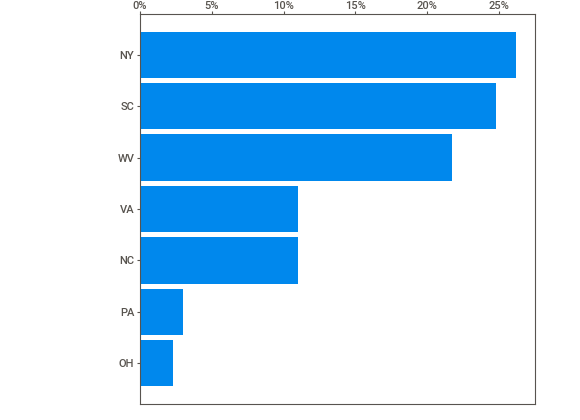
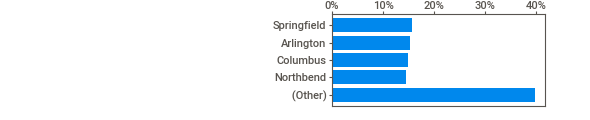
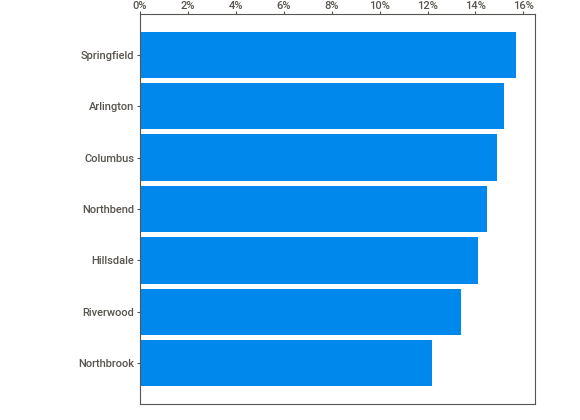
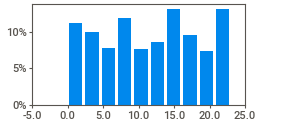
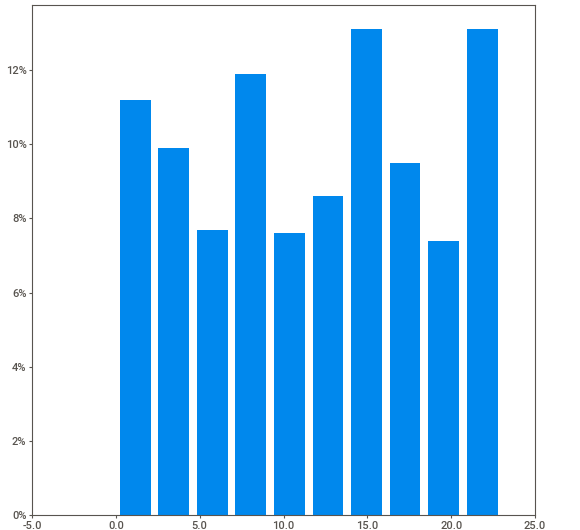
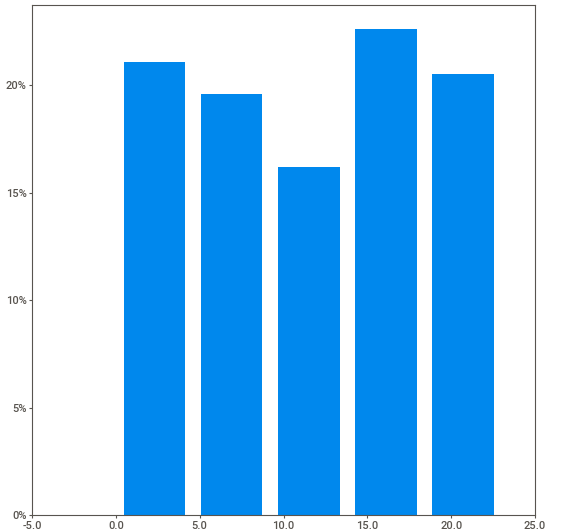
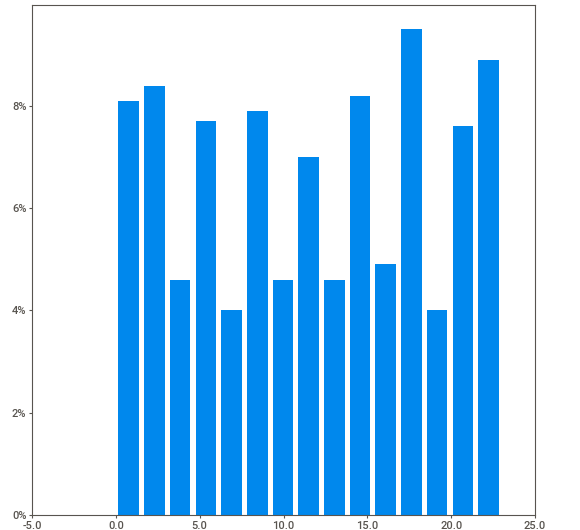
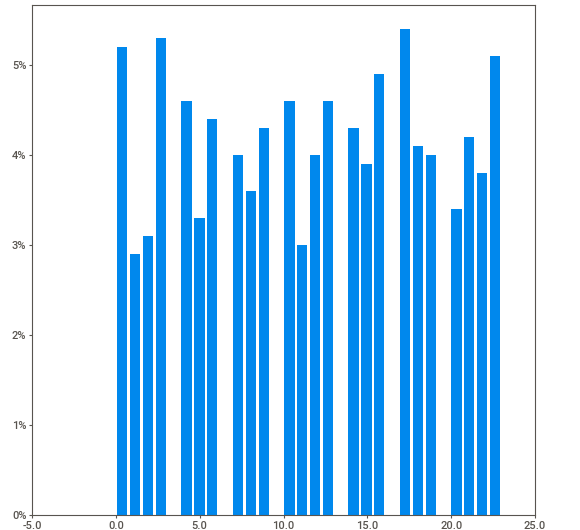
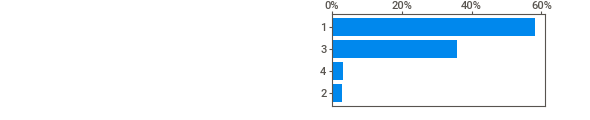
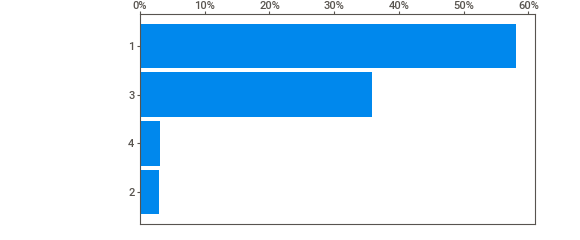
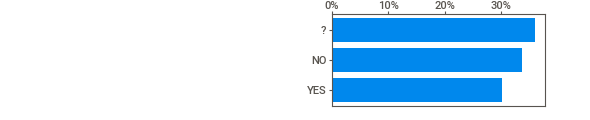
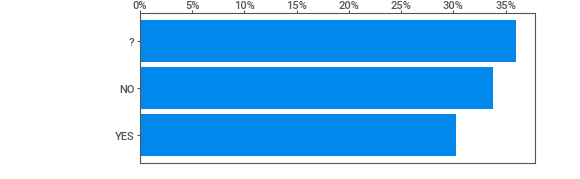
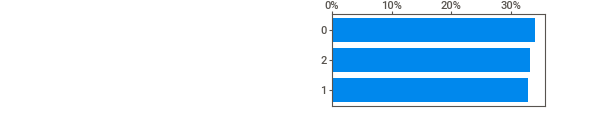
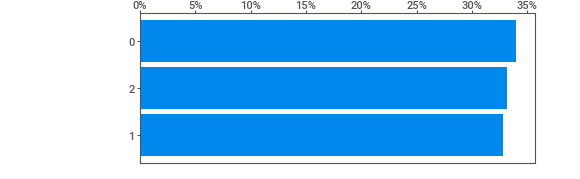
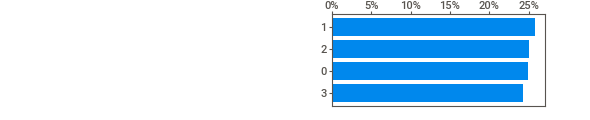
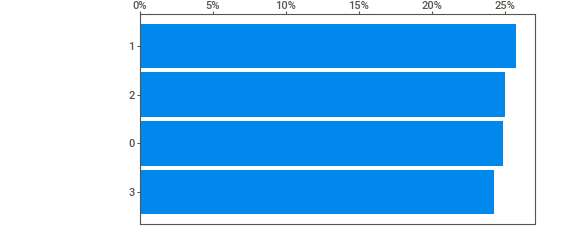
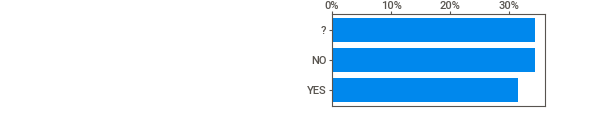
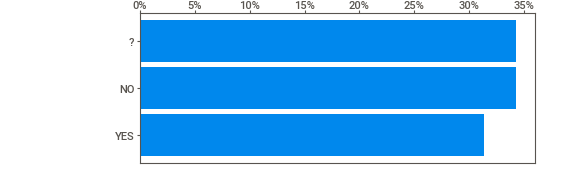
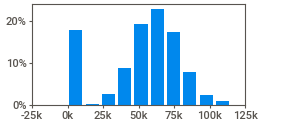
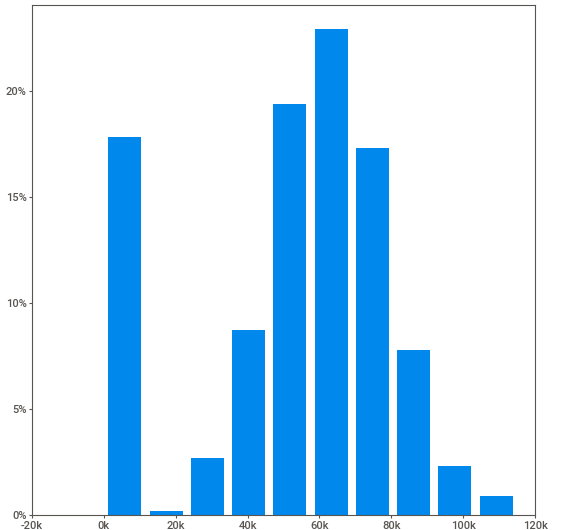
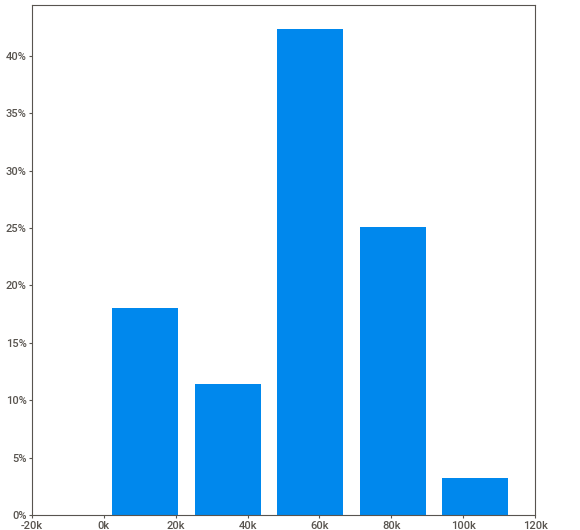
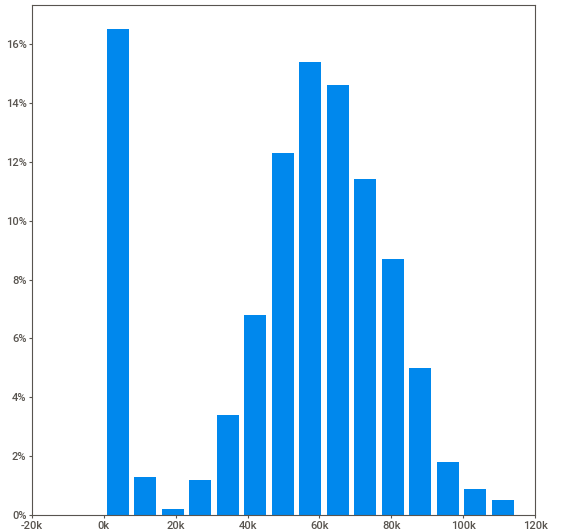
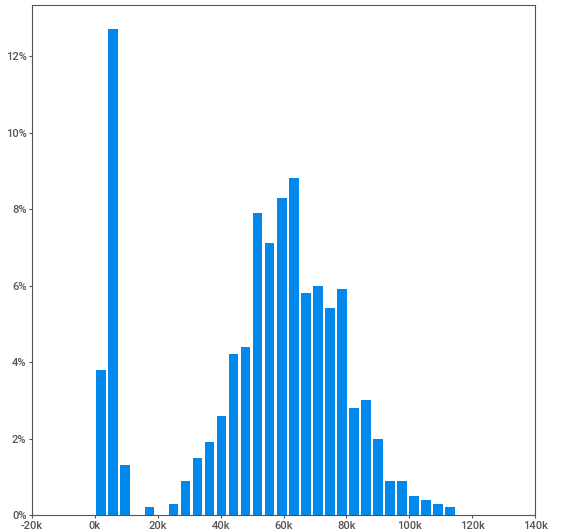
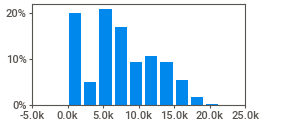
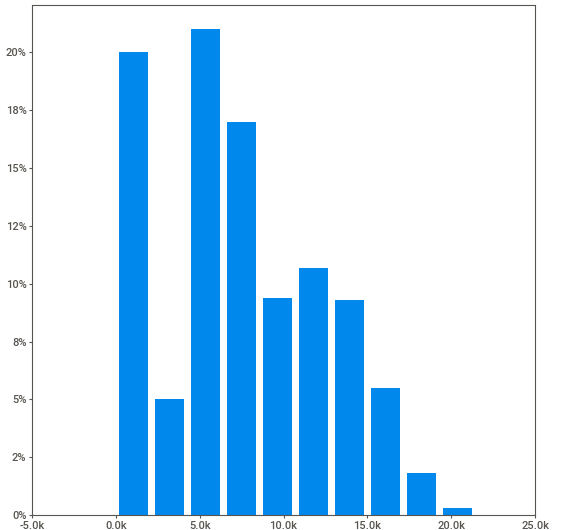
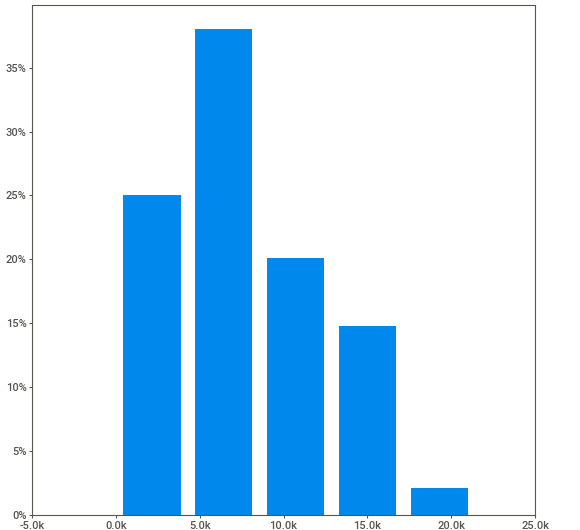
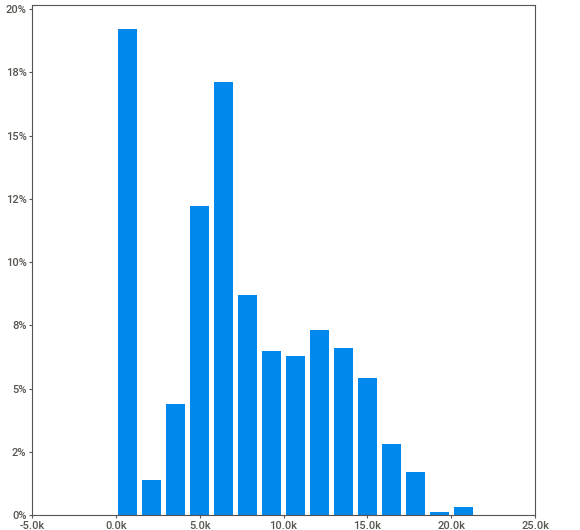
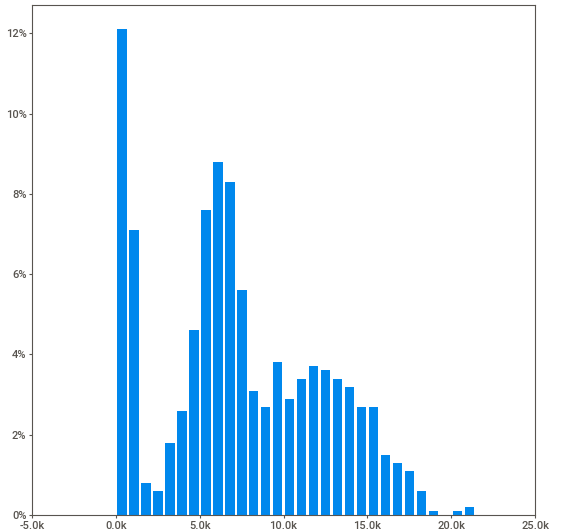
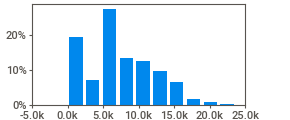
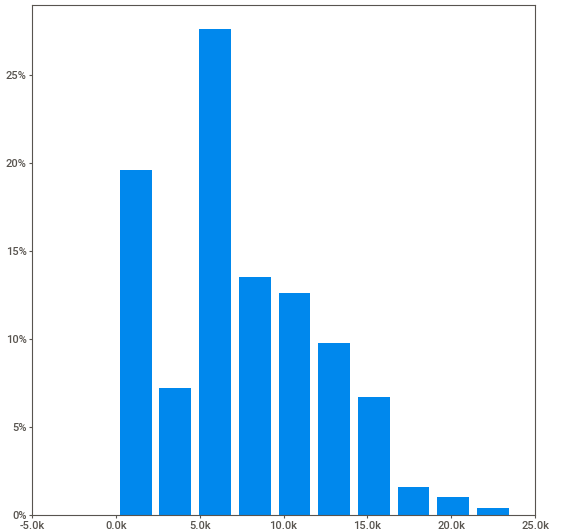
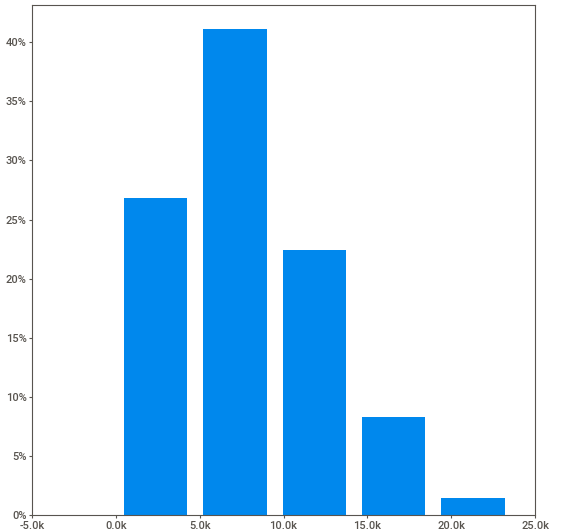
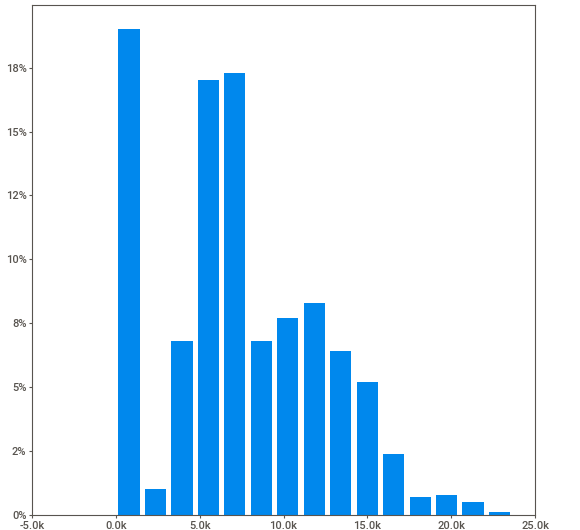
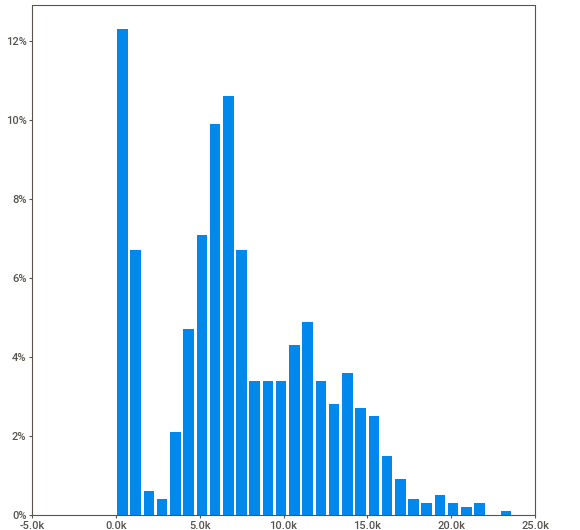
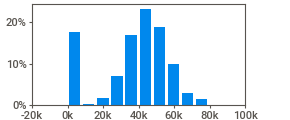
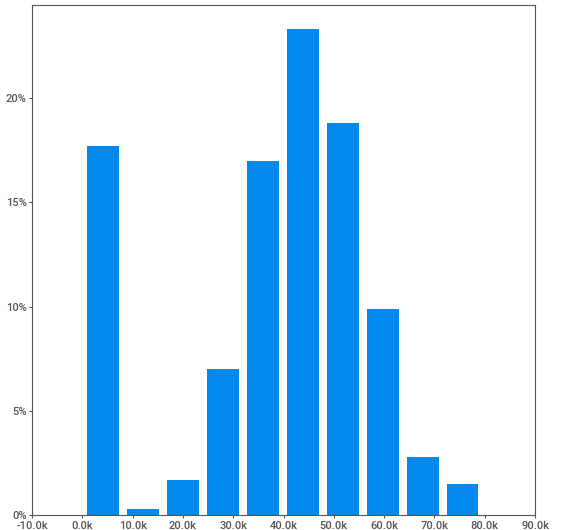
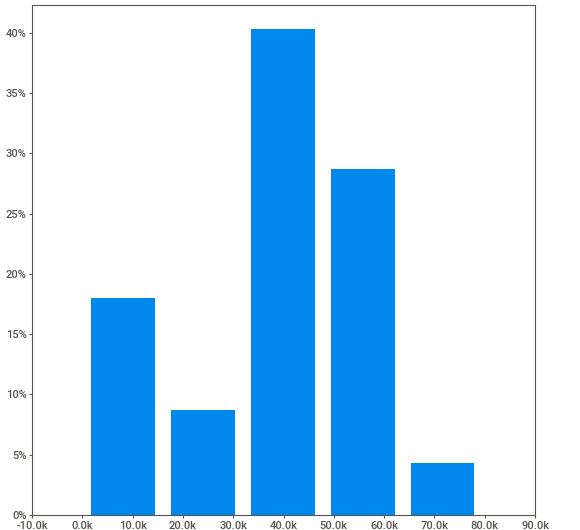
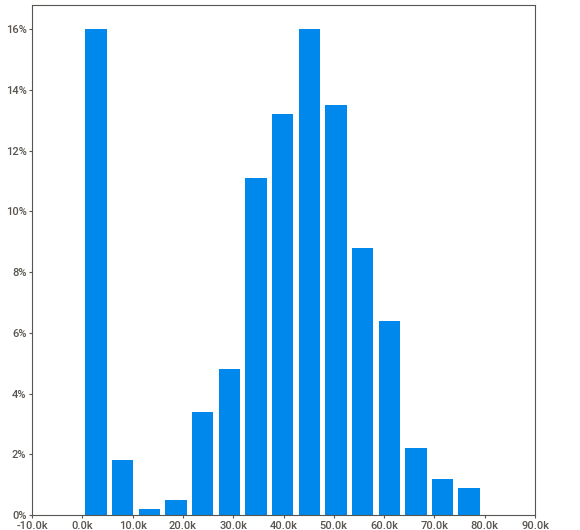
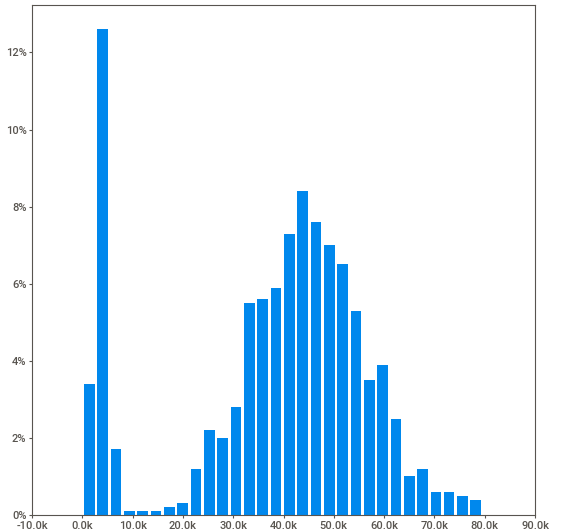
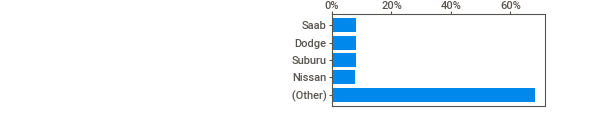
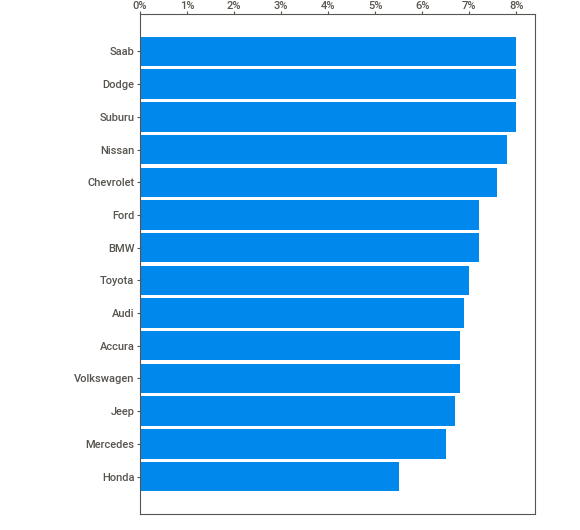
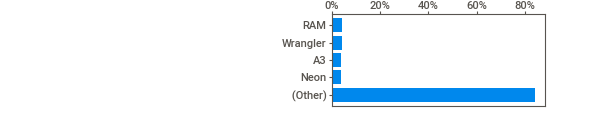
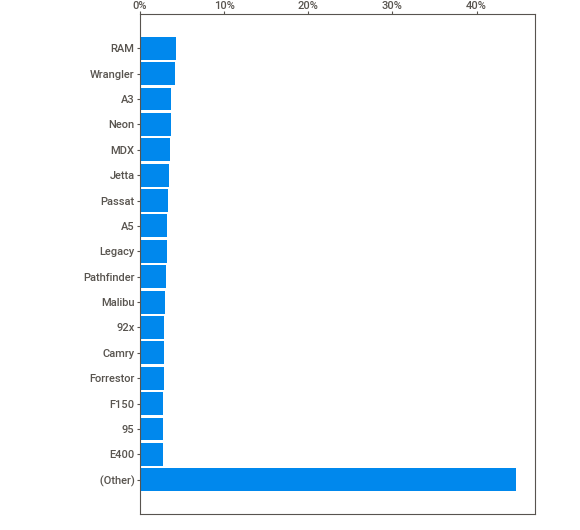
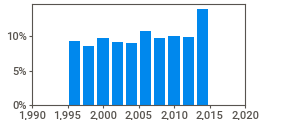
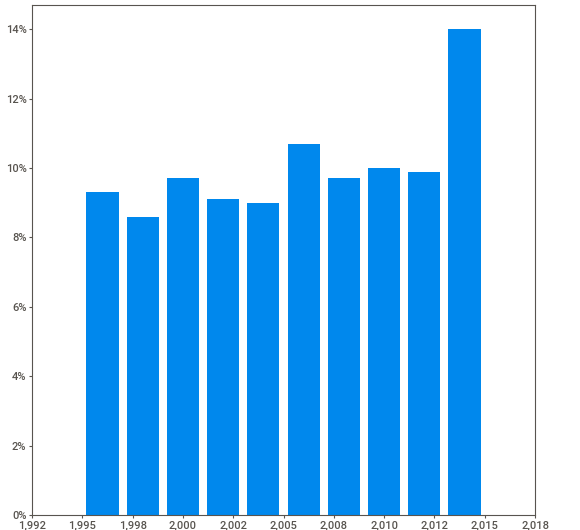
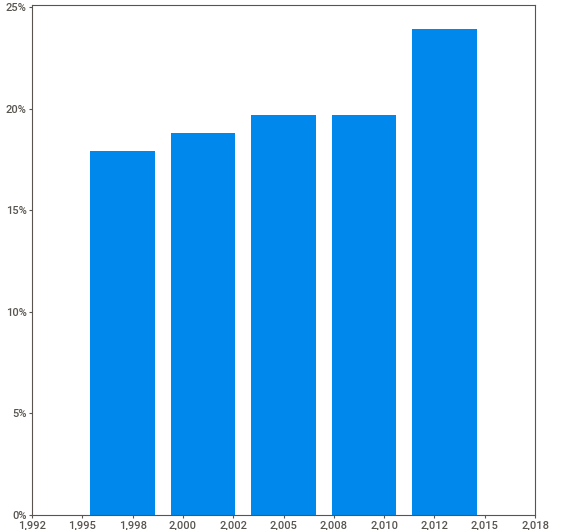
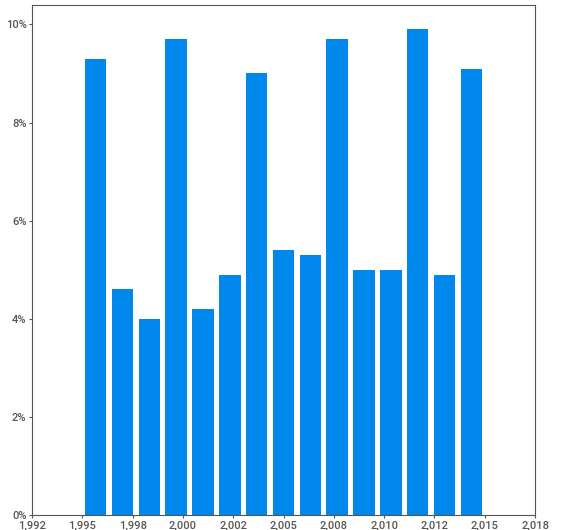
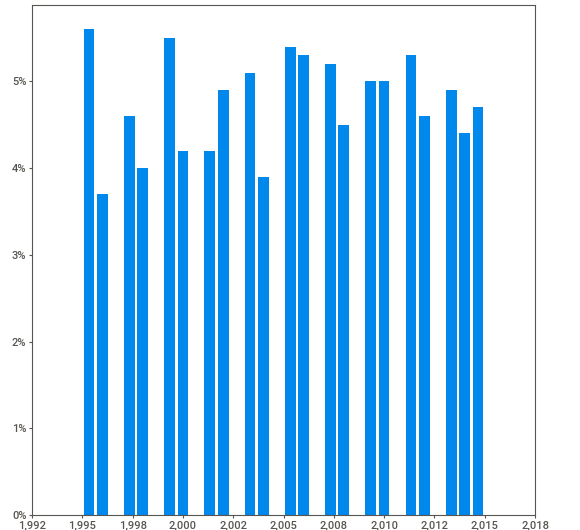
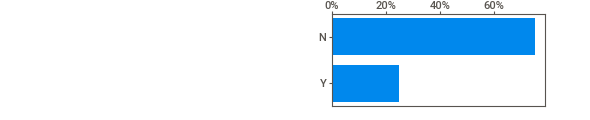
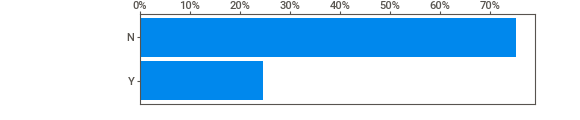
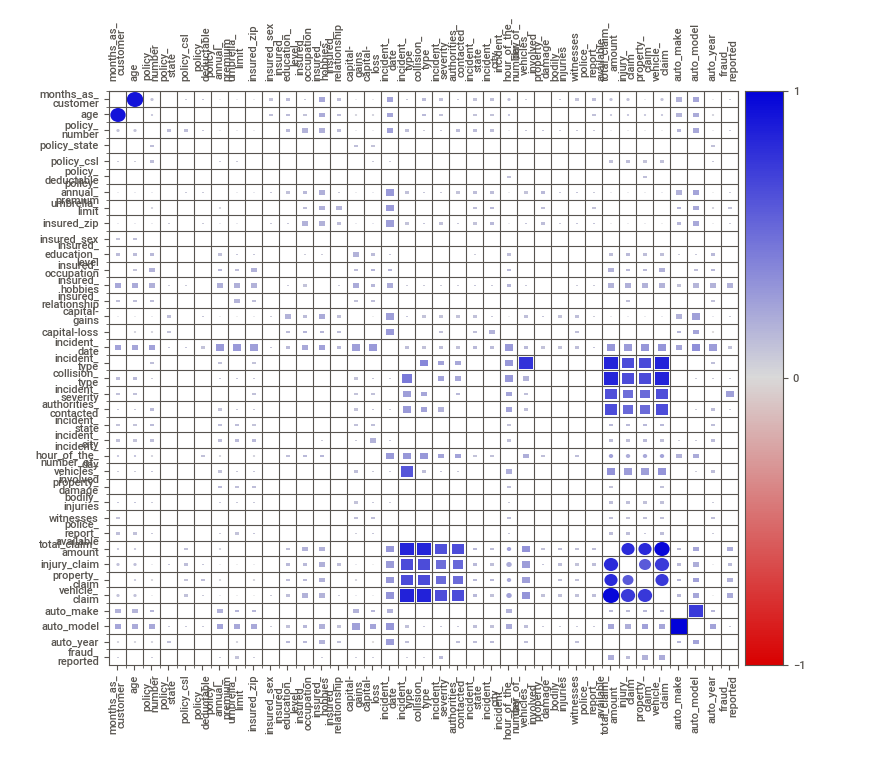
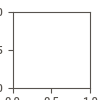

In [9]:
import sweetviz as sw
report = sw.analyze(df)
report.show_notebook(layout='vertical')

In [10]:
df=df.drop(['policy_number','policy_bind_date','incident_date','incident_location','_c39'],axis=1)

In [11]:
categ=df.select_dtypes(include='object')
num=df.select_dtypes(exclude='object')

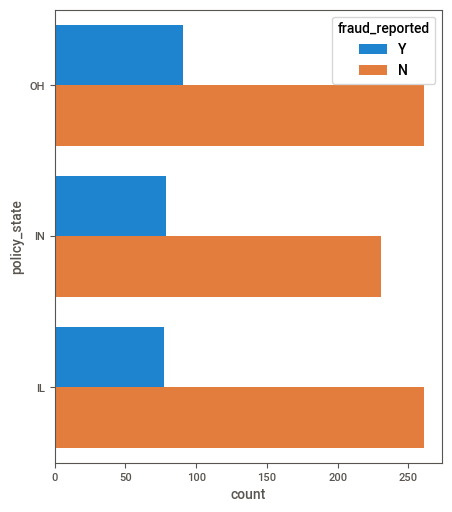

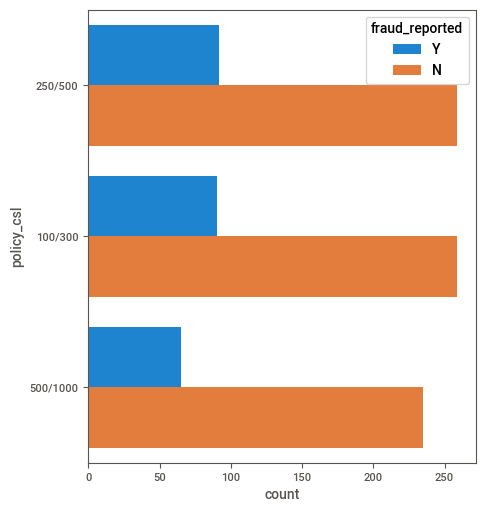

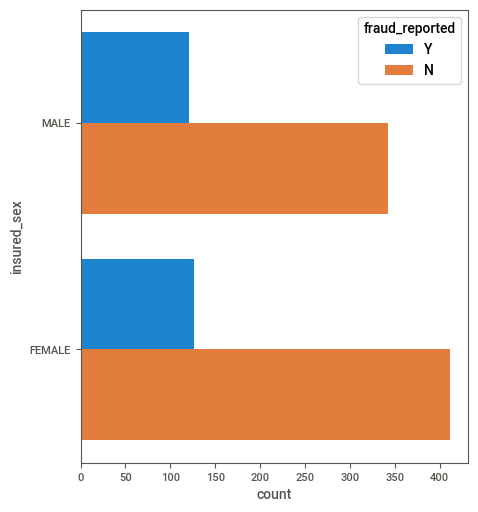

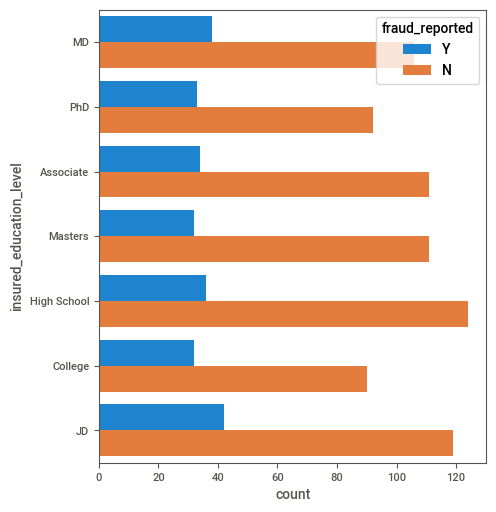

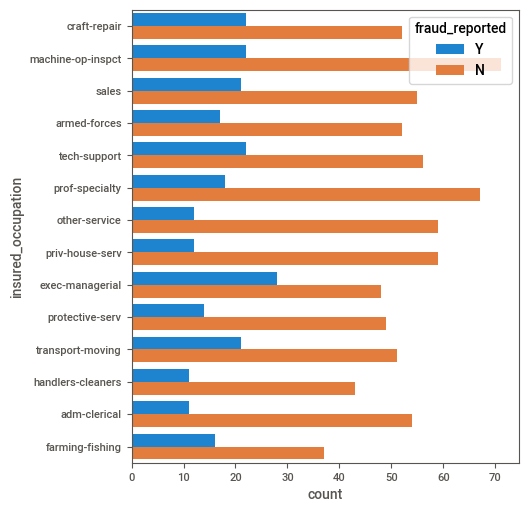

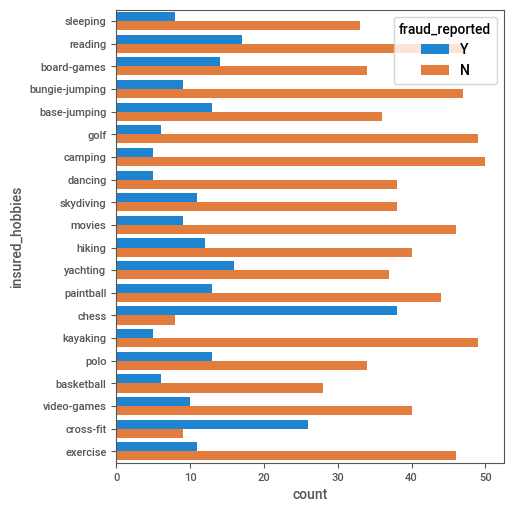

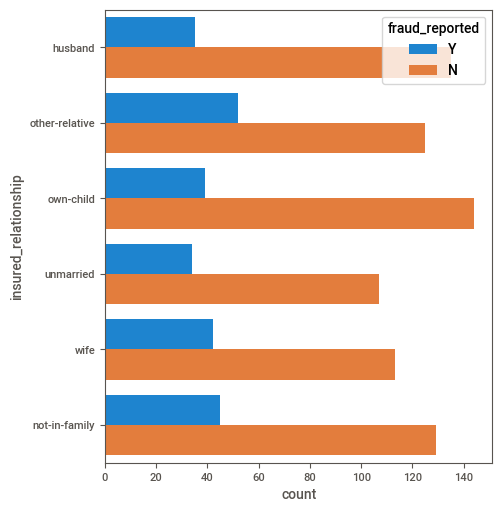

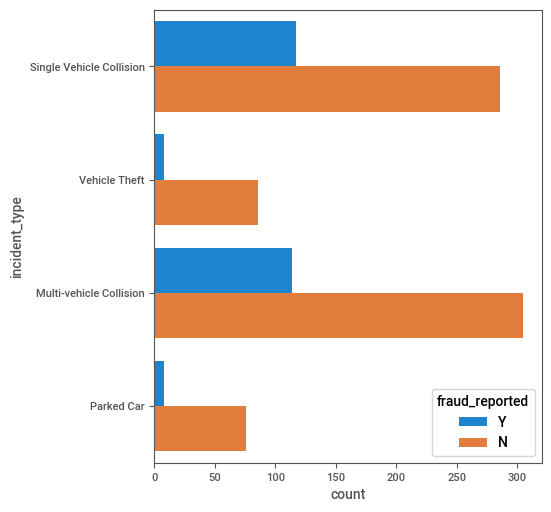

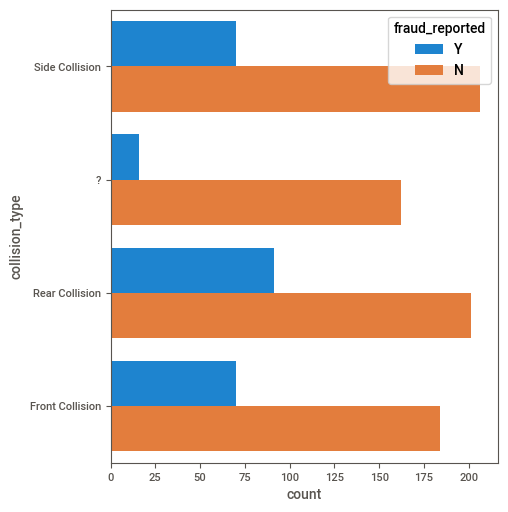

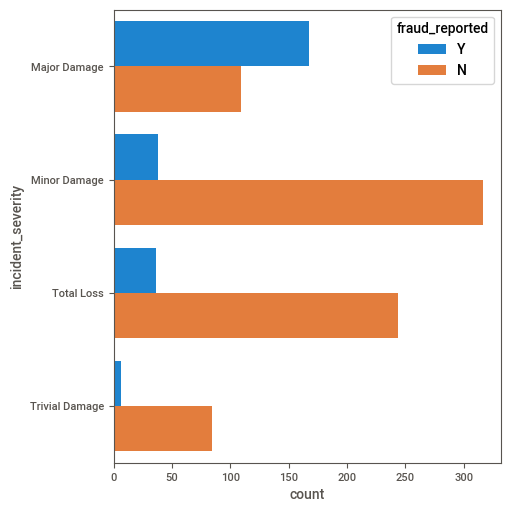

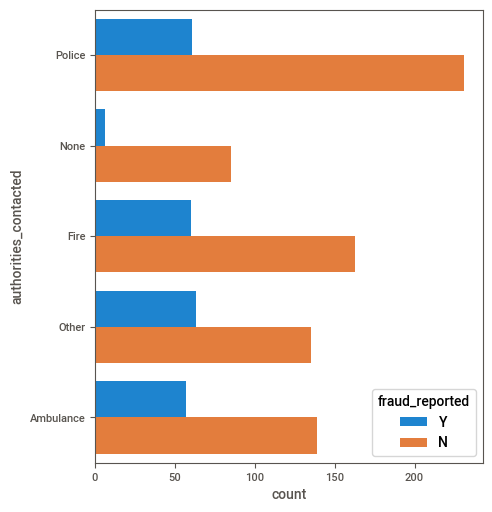

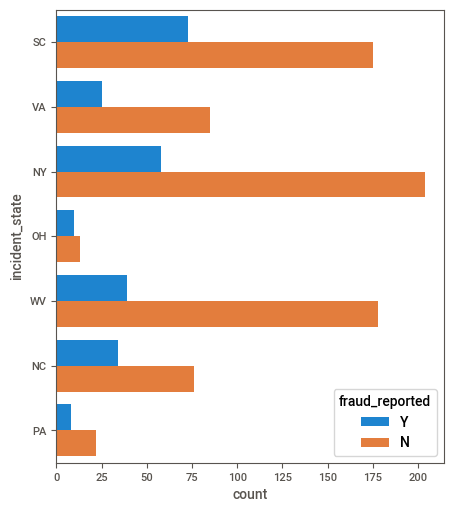

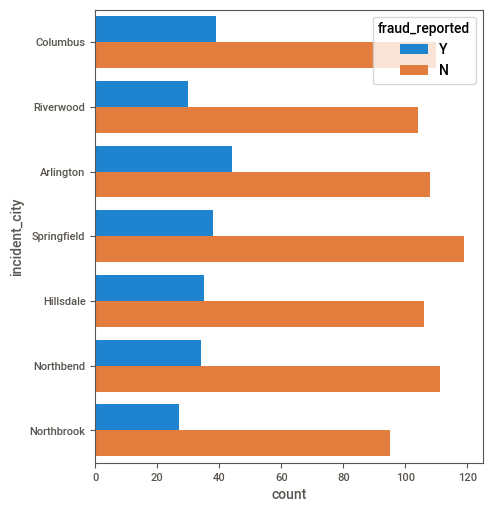

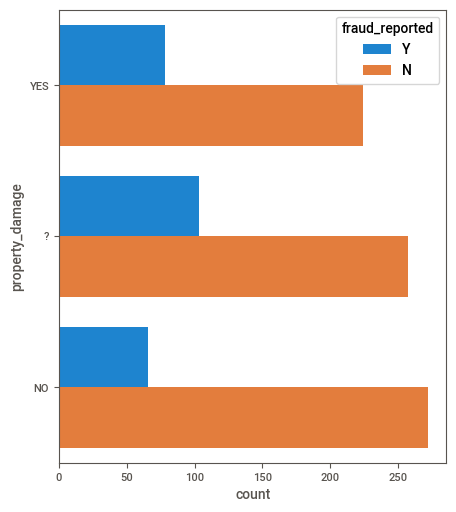

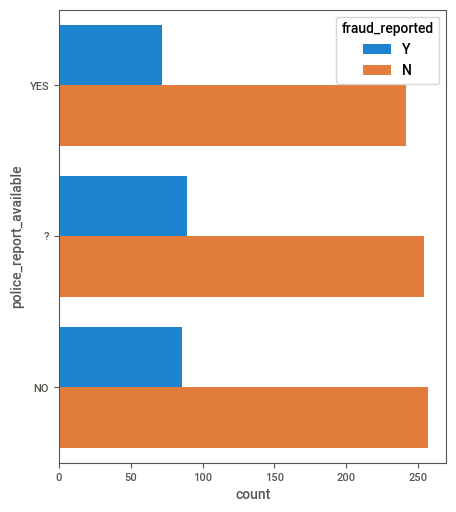

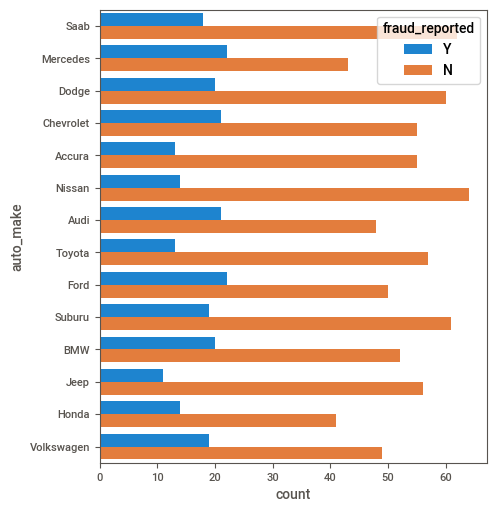

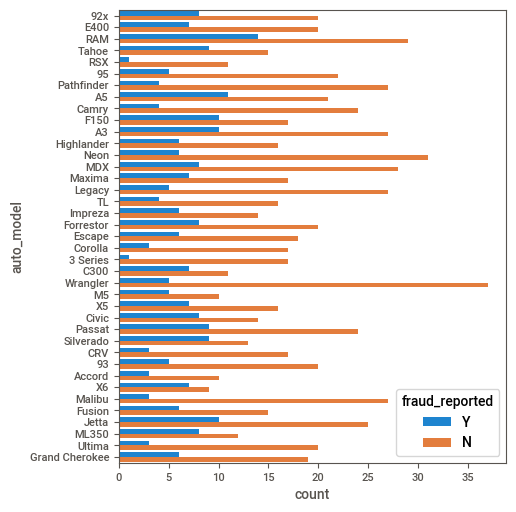

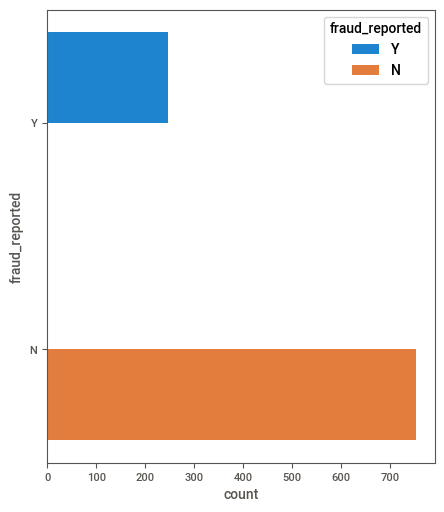

In [12]:
for i in categ:
    plt.figure(figsize=(5,6))
    sns.countplot(y=i,hue='fraud_reported',data=df)
    plt.show()

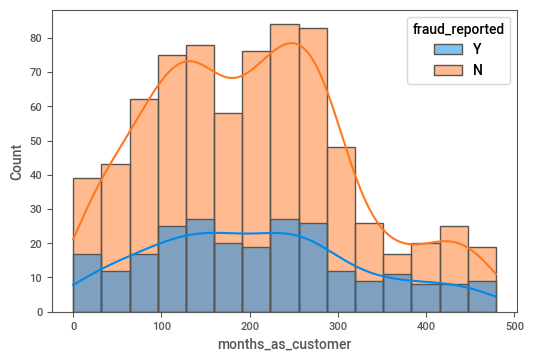

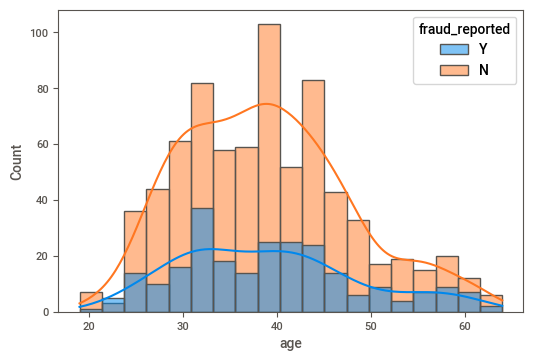

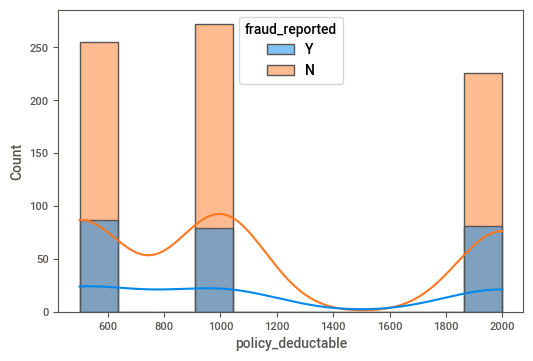

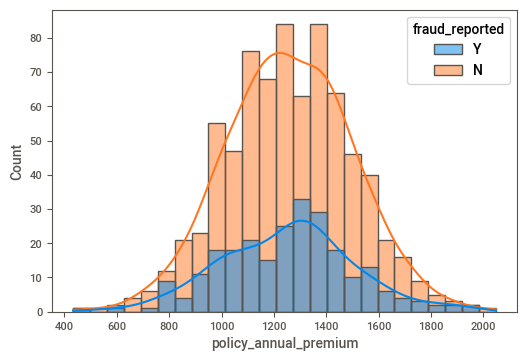

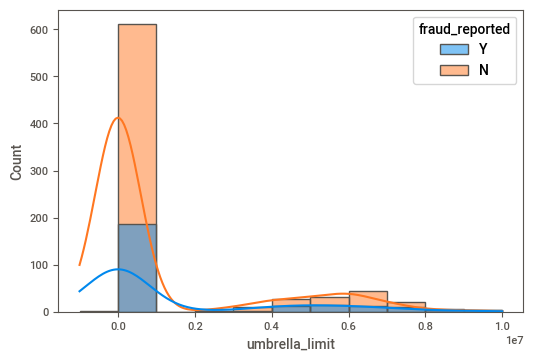

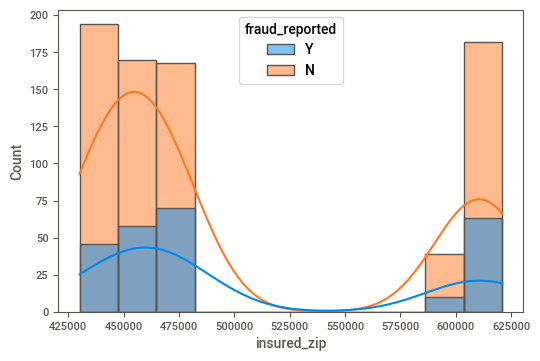

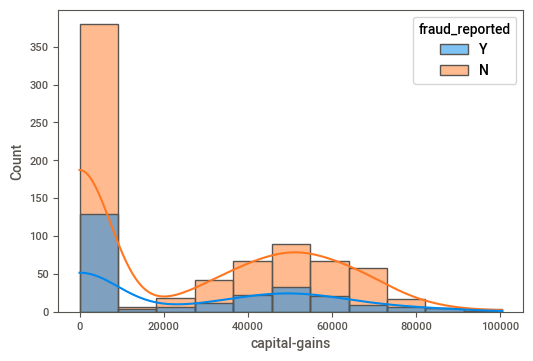

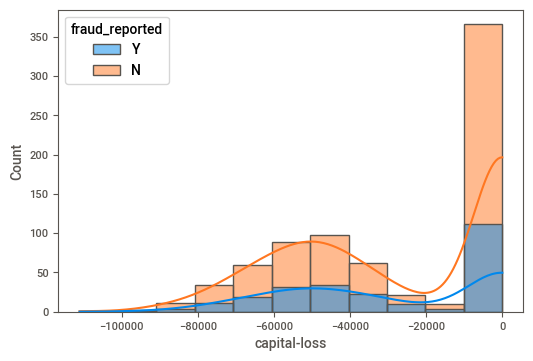

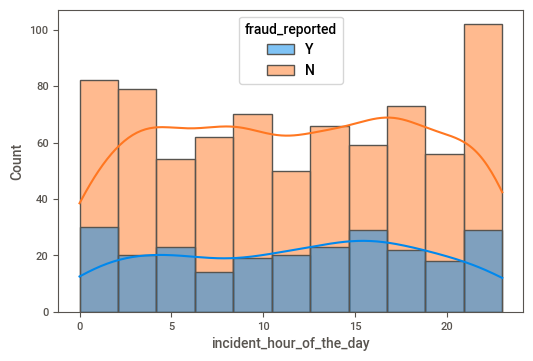

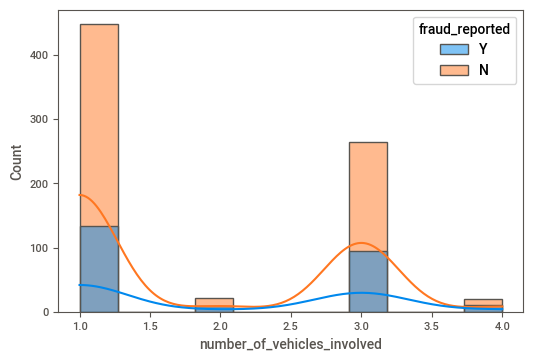

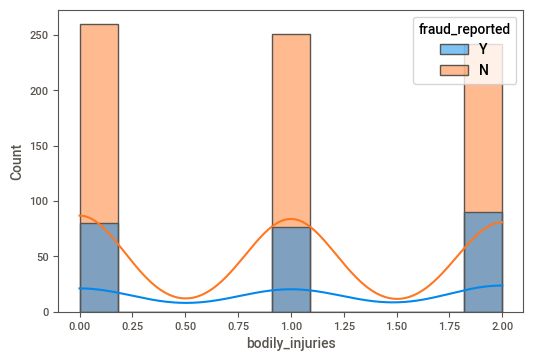

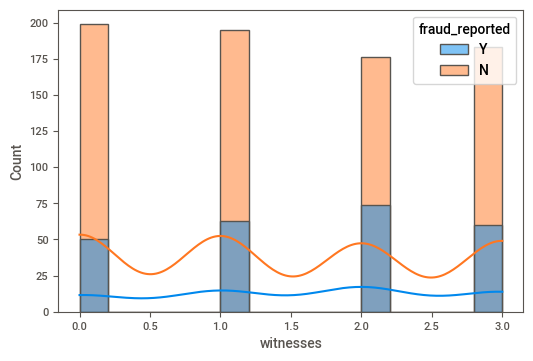

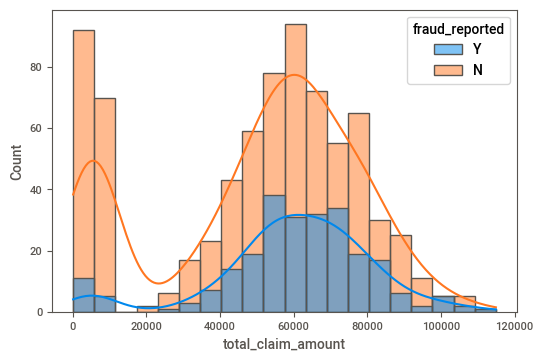

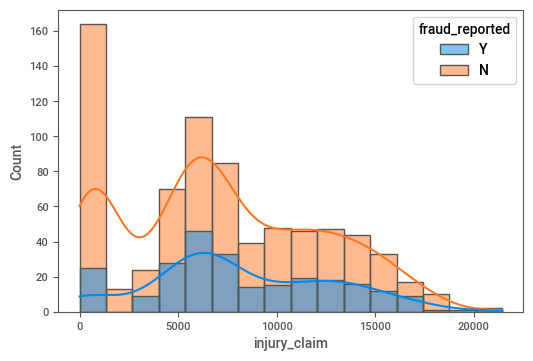

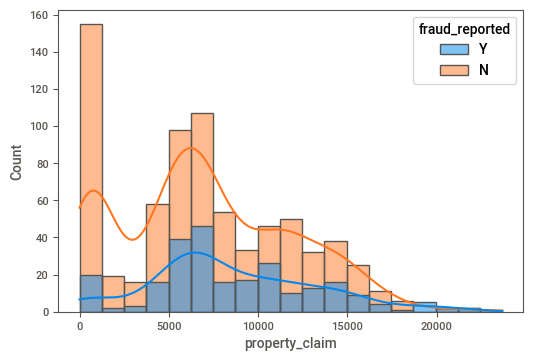

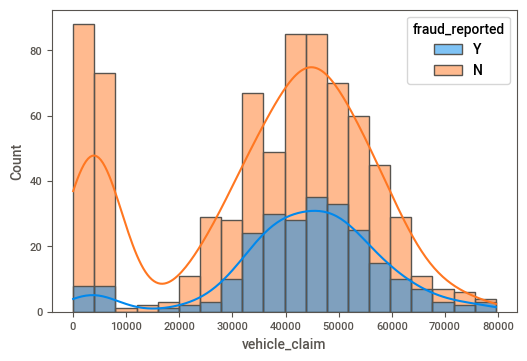

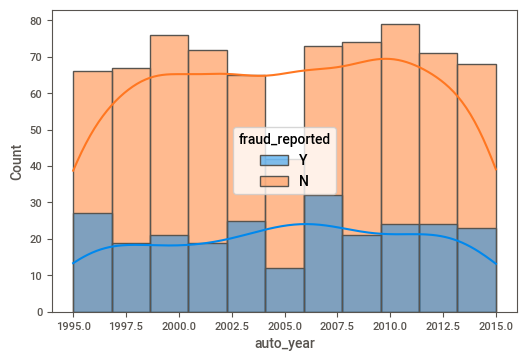

In [13]:
for i in num:
    sns.histplot(x=i,hue='fraud_reported',data=df,kde=True)
    plt.show()

In [14]:
# Perform label encoding for categorical columns
label_encoder = LabelEncoder()
for col in categ:
    df[col] = label_encoder.fit_transform(df[col])

# Perform standard scaling for numerical columns
scaler = StandardScaler()
df[num.columns] = scaler.fit_transform(df[num.columns])

In [15]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=32)
print("xtrain shape:",xtrain.shape)
print("xtest shape:",xtest.shape)
print("ytrain shape:",ytrain.shape)
print("ytest shape:",ytest.shape)

xtrain shape: (800, 34)
xtest shape: (200, 34)
ytrain shape: (800,)
ytest shape: (200,)


In [17]:
lr= LogisticRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ypred, ytest)))
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

scores = cross_val_score(lr, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy 71.50%
[[130  19]
 [ 38  13]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       149
           1       0.41      0.25      0.31        51

    accuracy                           0.71       200
   macro avg       0.59      0.56      0.57       200
weighted avg       0.68      0.71      0.69       200

Scores: [0.79  0.765 0.7   0.79  0.815]
Mean score: 0.772
Standard deviation: 0.039319206502675015


In [18]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
ypred = dtc.predict(xtest)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ypred, ytest)))
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

scores = cross_val_score(dtc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy 76.00%
[[121  28]
 [ 20  31]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       149
           1       0.53      0.61      0.56        51

    accuracy                           0.76       200
   macro avg       0.69      0.71      0.70       200
weighted avg       0.77      0.76      0.77       200

Scores: [0.785 0.735 0.775 0.77  0.81 ]
Mean score: 0.775
Standard deviation: 0.02428991560298226


In [19]:
svc = SVC()
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ypred, ytest)))
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

scores = cross_val_score(svc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy 74.50%
[[149   0]
 [ 51   0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200

Scores: [0.75  0.75  0.755 0.755 0.755]
Mean score: 0.7529999999999999
Standard deviation: 0.00244948974278318


In [20]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ypred, ytest)))
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

scores = cross_val_score(rfc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy 73.50%
[[131  18]
 [ 35  16]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       149
           1       0.47      0.31      0.38        51

    accuracy                           0.73       200
   macro avg       0.63      0.60      0.60       200
weighted avg       0.71      0.73      0.72       200

Scores: [0.775 0.785 0.72  0.76  0.8  ]
Mean score: 0.768
Standard deviation: 0.02731300056749535


-DECISIONTREE CLASSIFIER HAVE HIGH ACCURACY TO PREDICT INSURANCE FRAUD CLAIM

In [21]:
# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}

In [22]:
# Perform grid search
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(x, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
model = DecisionTreeClassifier(**best_params)
dtc.fit(x, y)

# Make predictions on the data
ypred = dtc.predict(x)

# Evaluate the model's performance
accuracy = accuracy_score(y, ypred)
print('Best Parameters:', best_params)
print('Best Score:', best_score)
print('Accuracy:', accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.865
Accuracy: 1.0


In [23]:
# Save the model to a file
joblib.dump(dtc, 'insurance_fraud.joblib')

# Load the model from a file
loaded_model = joblib.load('insurance_fraud.joblib')

# Use the loaded model to make predictions
ypred = loaded_model.predict(xtest)

In [24]:
testingdata_fraudinsurance =pd.DataFrame({'Insurance_fraud':ytest,'Predicted_Insurance_fraud':ypred},columns=['Insurance_fraud','Predicted_Insurance_fraud'])
testingdata_fraudinsurance

Insurance_fraud  Predicted_Insurance_fraud
632                0                          0
687                0                          0
833                0                          0
182                0                          0
831                1                          1
668                0                          0
375                0                          0
789                0                          0
402                1                          1
599                0                          0
587                1                          1
169                0                          0
74                 0                          0
860                0                          0
898                0                          0
149                1                          1
682                0                          0
697                0                          0
123                0                          0
464                0                          0
904                0                          0
296                0                          0
51                 0                          0
146                1                          1
649                1                          1
948                0                          0
435                0                          0
50                 0                          0
996                0                          0
820                0                          0
11                 0                          0
81                 0                          0
528                0                          0
952                0                          0
575                0                          0
572                0                          0
205                0                          0
85                 0                          0
639                0                          0
96                 1                          1
245                1                          1
535                1                          1
750                0                          0
818                0                          0
467                0                          0
39                 1                          1
86                 0                          0
92                 0                          0
250                1                          1
940                0                          0
660                0                          0
424                1                          1
824                0                          0
978                0                          0
910                0                          0
452                0                          0
597                1                          1
151                0                          0
603                0                          0
237                1                          1
670                0                          0
220                1                          1
475                0                          0
581                0                          0
122                1                          1
415                0                          0
822                0                          0
557                0                          0
36                 1                          1
683                1                          1
99                 0                          0
263                0                          0
195                0                          0
407                0                          0
889                0                          0
300                0                          0
781                0                          0
643                1                          1
888                0                          0
238                0                          0
977                1                          1
959                0                          0
109                1 